In [1355]:
import tensorflow as tf

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from pandas import Series
import math
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras import layers
import pandas as pd

data = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [1356]:

cbwd = pd.get_dummies(data['cbwd'])
cbwd.columns = ["cbwd_{}".format(i) for i in range(cbwd.shape[1])]
data = pd.concat([data, cbwd], axis=1)

In [1357]:
data.drop(['cbwd'], axis=1, inplace=True)


In [1358]:
data.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_0,cbwd_1,cbwd_2,cbwd_3
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,1.79,0,0,0,1,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,4.92,0,0,0,1,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,6.71,0,0,0,1,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,9.84,0,0,0,1,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,12.97,0,0,0,1,0,0


In [1359]:
cols = list(data.columns[5:])


In [1360]:
data['pm2.5'] = data['pm2.5'].fillna(method='ffill').fillna(method='bfill')

In [1361]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_0,cbwd_1,cbwd_2,cbwd_3
0,1,2010,1,1,0,129.0,-21,-11.0,1021.0,1.79,0,0,0,1,0,0
1,2,2010,1,1,1,129.0,-21,-12.0,1020.0,4.92,0,0,0,1,0,0
2,3,2010,1,1,2,129.0,-21,-11.0,1019.0,6.71,0,0,0,1,0,0
3,4,2010,1,1,3,129.0,-21,-14.0,1019.0,9.84,0,0,0,1,0,0
4,5,2010,1,1,4,129.0,-20,-12.0,1018.0,12.97,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0


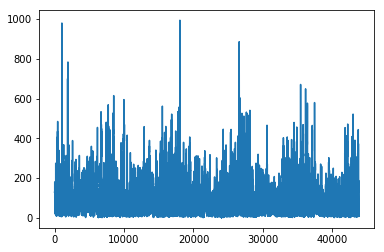

In [1110]:
plt.plot(data['pm2.5'])

In [811]:
data.columns[5:]

Index(['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'cbwd_0', 'cbwd_1',
       'cbwd_2', 'cbwd_3'],
      dtype='object')

In [1362]:
from sklearn.preprocessing import MinMaxScaler
values = data[data.columns[5:]].values.reshape(-1,11)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [1363]:
scaled

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [50]:
values_aug.shape

(43824, 4)

In [53]:
timew=X_aug1[0].reshape(-1,1)

In [56]:
values_aug=np.concatenate((timew,values_aug),axis=1)

In [687]:
X_aug=X_aug.reshape(-1,1)

In [688]:
scaled_aug = scaler.fit_transform(X_aug)

In [1366]:
train_size = int(len(scaled) * 0.80)
val_size = int(len(scaled) * 0.10)

test_size = len(scaled) - train_size-val_size
train,val, test = scaled[0:train_size,:],scaled[train_size:train_size+val_size,:], scaled[train_size+val_size:,:]
print(len(train),len(val), len(test))

35059 4382 4383


In [689]:
train_size = int(len(scaled_aug) * 0.81)
val_size = len(scaled_aug) - train_size

test_size = len(scaled_aug) - train_size
train_aug, test_aug = scaled_aug[0:train_size,:], scaled_aug[train_size:len(scaled),:]
print(len(train_aug), len(test_aug))

35497 8327


In [1121]:
def create_dataset_mul(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [13]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [1372]:
look_back = 48
trainX, trainY = create_dataset_mul(train, look_back)
valX, valY = create_dataset_mul(val, look_back)
testX, testY = create_dataset_mul(test, look_back)

35011
4334
4335


In [1373]:
valX.shape

(4334, 48, 11)

In [690]:
look_back = 24
trainX_aug, trainY_aug = create_dataset(train_aug, look_back)
#valX, valY = create_dataset(val, look_back)
testX_aug, testY_aug = create_dataset(test_aug, look_back)

35473
8303


In [1114]:
trainX.shape

(35473, 24, 11)

In [1139]:
first_input = Input(shape=(24,11))

in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(first_input)
in1= BatchNormalization(scale=False)(in1)

in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
in1= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

in1=add([in0,in1],name='extractor')
#ttn_layer = AttentionLayer(name='attention_layer')
#ttn_out, attn_states = attn_layer([in0,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#oncat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
in1=MaxPooling1D(pool_size=2)(in1)
in1=Flatten()(in1)
in1=Dense(100, activation='relu')(in1)
out=Dense(1)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

checkpoint_path = "saved_weights/pm2.5_res1d.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
# fit model
model.fit(trainX, trainY,validation_data=[testX,testY], epochs=200, verbose=1,callbacks=[cb])

Train on 35473 samples, validate on 8303 samples
Epoch 1/200
35424/35473 [============================>.] - ETA: 0s - loss: 0.0378
Epoch 00001: val_loss improved from inf to 0.00293, saving model to saved_weights/pm2.5_res1d.hdf5
35473/35473 [==============================] - 5s 137us/sample - loss: 0.0378 - val_loss: 0.0029
Epoch 2/200
35072/35473 [============================>.] - ETA: 0s - loss: 0.0021
Epoch 00002: val_loss improved from 0.00293 to 0.00175, saving model to saved_weights/pm2.5_res1d.hdf5
35473/35473 [==============================] - 4s 119us/sample - loss: 0.0021 - val_loss: 0.0018
Epoch 3/200
35232/35473 [============================>.] - ETA: 0s - loss: 0.0015
Epoch 00003: val_loss improved from 0.00175 to 0.00099, saving model to saved_weights/pm2.5_res1d.hdf5
35473/35473 [==============================] - 4s 118us/sample - loss: 0.0015 - val_loss: 9.8885e-04
Epoch 4/200
34976/35473 [============================>.] - ETA: 0s - loss: 0.0012
Epoch 00004: val_loss i

Epoch 33/200
35456/35473 [============================>.] - ETA: 0s - loss: 4.4003e-04
Epoch 00033: val_loss did not improve from 0.00043
35473/35473 [==============================] - 4s 115us/sample - loss: 4.4006e-04 - val_loss: 4.3168e-04
Epoch 34/200
35136/35473 [============================>.] - ETA: 0s - loss: 4.4238e-04
Epoch 00034: val_loss did not improve from 0.00043
35473/35473 [==============================] - 4s 117us/sample - loss: 4.4226e-04 - val_loss: 4.4799e-04
Epoch 35/200
35424/35473 [============================>.] - ETA: 0s - loss: 4.3063e-04
Epoch 00035: val_loss did not improve from 0.00043
35473/35473 [==============================] - 4s 115us/sample - loss: 4.3060e-04 - val_loss: 4.8426e-04
Epoch 36/200
35424/35473 [============================>.] - ETA: 0s - loss: 4.2540e-04
Epoch 00036: val_loss did not improve from 0.00043
35473/35473 [==============================] - 4s 116us/sample - loss: 4.2532e-04 - val_loss: 4.4555e-04
Epoch 37/200
35200/35473 [==

Epoch 67/200
35072/35473 [============================>.] - ETA: 0s - loss: 3.4256e-04
Epoch 00067: val_loss did not improve from 0.00043
35473/35473 [==============================] - 4s 115us/sample - loss: 3.4154e-04 - val_loss: 4.8147e-04
Epoch 68/200
35424/35473 [============================>.] - ETA: 0s - loss: 3.4343e-04
Epoch 00068: val_loss did not improve from 0.00043
35473/35473 [==============================] - 4s 115us/sample - loss: 3.4409e-04 - val_loss: 4.8139e-04
Epoch 69/200
35456/35473 [============================>.] - ETA: 0s - loss: 3.3764e-04
Epoch 00069: val_loss did not improve from 0.00043
35473/35473 [==============================] - 4s 116us/sample - loss: 3.3756e-04 - val_loss: 5.0385e-04
Epoch 70/200
35040/35473 [============================>.] - ETA: 0s - loss: 3.3406e-04
Epoch 00070: val_loss did not improve from 0.00043
35473/35473 [==============================] - 4s 116us/sample - loss: 3.3363e-04 - val_loss: 4.7287e-04
Epoch 71/200
35232/35473 [==

KeyboardInterrupt: 

In [1140]:
model.load_weights("saved_weights/pm2.5_res1d.hdf5")

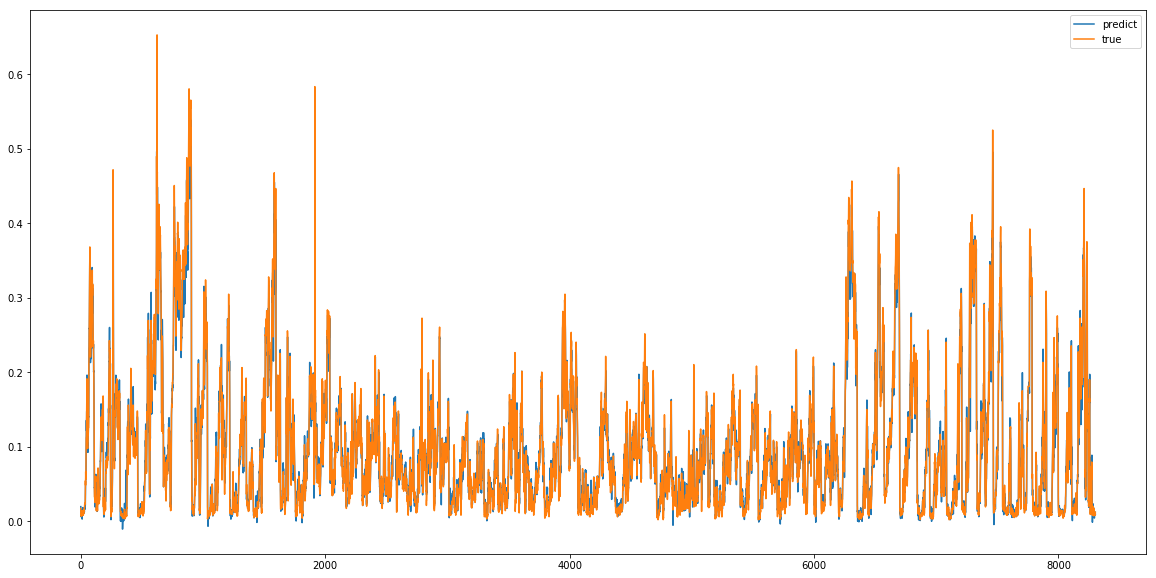

In [1141]:
yhat = model.predict(testX)

plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [1142]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.02077


0.02083, 0.020901, 0.0206, 0.02077

### aug pm2.5 + last var

In [59]:
def create_dataset_mul(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [691]:
trainX_aug, trainY_aug = create_dataset_mul(train_aug, look_back)
testX_aug, testY_aug = create_dataset_mul(test_aug, look_back)

35473
8303


In [692]:
testX_aug.shape

(8303, 24, 1)

In [1370]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1 ))

ValueError: cannot reshape array of size 18485808 into shape (35011,48,1)

In [20]:
from matplotlib import pyplot


In [16]:
model = Sequential()
model.add(Bidirectional(LSTM(100, input_shape=(7, trainX.shape[2]))))

model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

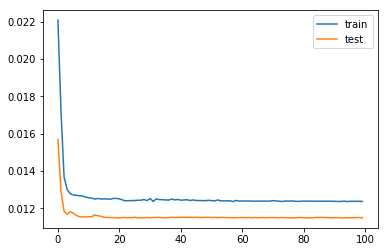

In [17]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

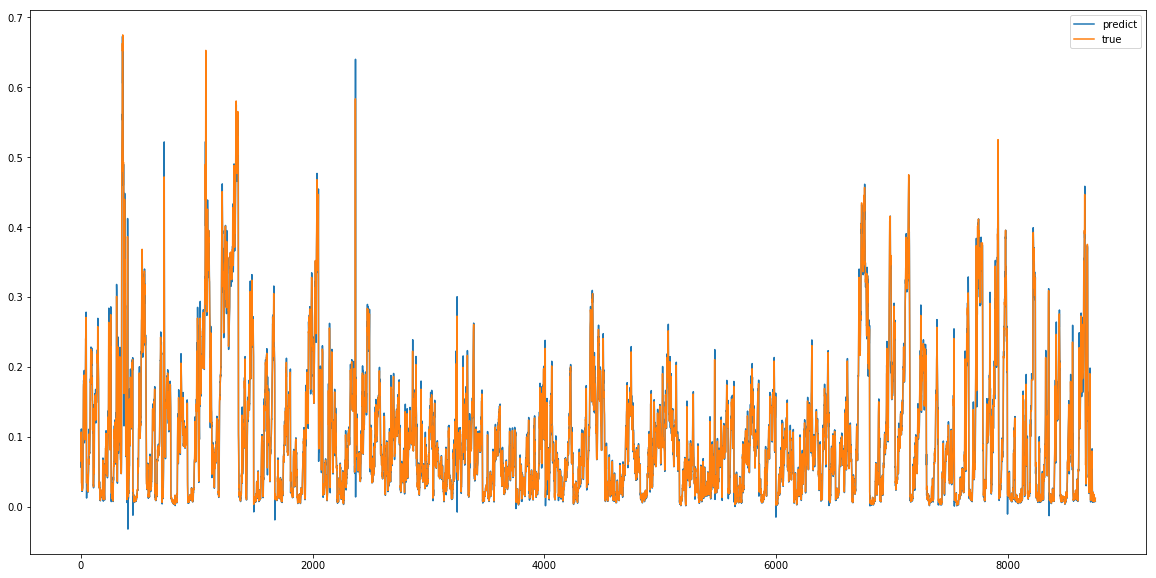

In [18]:
yhat = model.predict(testX)

plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [19]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1,1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [20]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 21.582


### conv2d

In [1374]:
data_train_wide = trainX.reshape((trainX.shape[0], trainX.shape[1], trainX.shape[2], 1))
data_val_wide = valX.reshape((valX.shape[0], valX.shape[1], valX.shape[2], 1))

data_test_wide = testX.reshape((testX.shape[0], testX.shape[1], testX.shape[2], 1))

In [1375]:
data_train_wide.shape

(35011, 48, 11, 1)

In [1377]:
import tensorflow
def basic_conv2D(n_filters=10, fsize=5, window_size=48, n_features=11):
    new_model = tensorflow.keras.Sequential()
    new_model.add(tf.keras.layers.Conv2D(n_filters, (1,fsize), padding='same', activation='relu', input_shape=(window_size, n_features, 1)))
    new_model.add(tf.keras.layers.Conv2D(n_filters, (1,fsize), padding='same', activation='relu'))
    #new_model.add(tf.keras.layers.Conv2D(n_filters, (1,fsize), padding='same', activation='relu'))

    new_model.add(tf.keras.layers.Flatten())
    #new_model.add(tf.keras.layers.Dense(1000, activation='relu'))
    new_model.add(tf.keras.layers.Dense(100,activation='relu'))
    new_model.add(tf.keras.layers.Dense(1))
    new_model.compile(optimizer='adam', loss='mse') 
    return new_model
m2 = basic_conv2D(n_filters=32, fsize=3, window_size=48, n_features=data_train_wide.shape[2])
m2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 48, 11, 32)        128       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 48, 11, 32)        3104      
_________________________________________________________________
flatten_182 (Flatten)        (None, 16896)             0         
_________________________________________________________________
dense_338 (Dense)            (None, 100)               1689700   
_________________________________________________________________
dense_339 (Dense)            (None, 1)                 101       
Total params: 1,693,033
Trainable params: 1,693,033
Non-trainable params: 0
_________________________________________________________________


In [312]:
checkpoint_path = "saved_weights/pm2.5_conv2d.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

In [1378]:
m2.fit(data_train_wide,trainY,validation_data=(data_val_wide,valY),epochs=10,callbacks=[cb])

Train on 35011 samples, validate on 4334 samples
Epoch 1/10
34976/35011 [============================>.] - ETA: 0s - loss: 0.1719
Epoch 00001: val_loss improved from 8.32714 to 0.17197, saving model to saved_weights/nasdaq_res1d_multi2.hdf5
35011/35011 [==============================] - 10s 280us/sample - loss: 0.1719 - val_loss: 0.1720
Epoch 2/10
34976/35011 [============================>.] - ETA: 0s - loss: 0.1652
Epoch 00002: val_loss did not improve from 0.17197
35011/35011 [==============================] - 10s 272us/sample - loss: 0.1652 - val_loss: 0.1720
Epoch 3/10
34944/35011 [============================>.] - ETA: 0s - loss: 0.1652
Epoch 00003: val_loss improved from 0.17197 to 0.17184, saving model to saved_weights/nasdaq_res1d_multi2.hdf5
35011/35011 [==============================] - 10s 274us/sample - loss: 0.1652 - val_loss: 0.1718
Epoch 4/10
34944/35011 [============================>.] - ETA: 0s - loss: 0.1653
Epoch 00004: val_loss improved from 0.17184 to 0.17175, savi

KeyboardInterrupt: 

In [314]:
m2.load_weights("saved_weights/pm2.5_conv2d.hdf5")

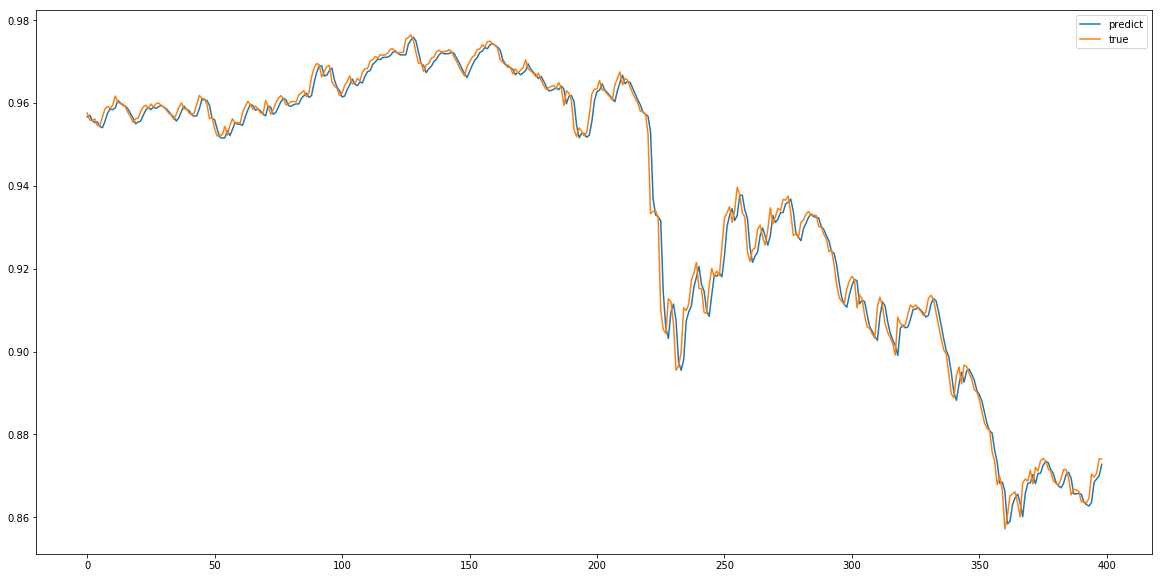

In [332]:
yhat = m2.predict(data_test_wide)

plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [121]:
yhat.shape

(8320, 1)

In [122]:
testY.shape

(8320,)

In [123]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1,1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [124]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 20.003


### biLSTM + Attention

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Concatenate, Flatten
#from attention_keras import AttentionLayer
from tensorflow.keras import Model

    #num_inputs = 5
    #seq_length = 10
inputs = Input(shape=(7, 1), name='inputs')
lstm_out = Bidirectional(LSTM(200, return_sequences=True))(inputs)
#lstm_out = LSTM(64, return_sequences=True)(lstm_out)

    # Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([lstm_out, lstm_out])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
concat_out = Concatenate(axis=-1, name='concat_layer')([lstm_out, attn_out])
flat_out = Flatten()(concat_out)

    # Dense layer
#dense_out = Dense(6, activation='relu')(flat_out)
predictions= Dense(1)(flat_out)

    # Full model
full_model = Model(inputs=inputs, outputs=predictions)
full_model.compile(optimizer='adam', loss='mse')

In [20]:
checkpoint_path = "saved_weights/multi_Bahdanau_pm2._attlstm.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

In [21]:
history = full_model.fit(trainX, trainY, epochs=1000, batch_size=100, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[cb])

Train on 35490 samples, validate on 8320 samples
Epoch 1/1000
35300/35490 [============================>.] - ETA: 0s - loss: 0.0014
Epoch 00001: val_loss improved from inf to 0.00057, saving model to saved_weights/multi_Bahdanau_pm2._attlstm.hdf5
35490/35490 [==============================] - 16s 449us/sample - loss: 0.0014 - val_loss: 5.6609e-04
Epoch 2/1000
35300/35490 [============================>.] - ETA: 0s - loss: 7.6947e-04
Epoch 00002: val_loss improved from 0.00057 to 0.00046, saving model to saved_weights/multi_Bahdanau_pm2._attlstm.hdf5
35490/35490 [==============================] - 12s 349us/sample - loss: 7.7965e-04 - val_loss: 4.6481e-04
Epoch 3/1000
35300/35490 [============================>.] - ETA: 0s - loss: 6.4080e-04
Epoch 00003: val_loss improved from 0.00046 to 0.00044, saving model to saved_weights/multi_Bahdanau_pm2._attlstm.hdf5
35490/35490 [==============================] - 12s 349us/sample - loss: 6.5012e-04 - val_loss: 4.3680e-04
Epoch 4/1000
35300/35490 [=

Epoch 33/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.5695e-04
Epoch 00033: val_loss did not improve from 0.00043
35490/35490 [==============================] - 12s 349us/sample - loss: 5.6673e-04 - val_loss: 4.4099e-04
Epoch 34/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.5501e-04
Epoch 00034: val_loss did not improve from 0.00043
35490/35490 [==============================] - 12s 348us/sample - loss: 5.6500e-04 - val_loss: 4.3482e-04
Epoch 35/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.5361e-04
Epoch 00035: val_loss did not improve from 0.00043
35490/35490 [==============================] - 12s 349us/sample - loss: 5.6364e-04 - val_loss: 4.3533e-04
Epoch 36/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.5273e-04
Epoch 00036: val_loss improved from 0.00043 to 0.00043, saving model to saved_weights/multi_Bahdanau_pm2._attlstm.hdf5
35490/35490 [==============================] - 12s 349us/s

Epoch 97/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.4092e-04
Epoch 00097: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 348us/sample - loss: 5.5076e-04 - val_loss: 4.2690e-04
Epoch 98/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.4081e-04
Epoch 00098: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 348us/sample - loss: 5.5064e-04 - val_loss: 4.2680e-04
Epoch 99/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.4083e-04
Epoch 00099: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 348us/sample - loss: 5.5065e-04 - val_loss: 4.2667e-04
Epoch 100/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.4060e-04
Epoch 00100: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 348us/sample - loss: 5.5043e-04 - val_loss: 4.2659e-04
Epoch 101/1000
3530

Epoch 157/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.3713e-04
Epoch 00157: val_loss improved from 0.00042 to 0.00042, saving model to saved_weights/multi_Bahdanau_pm2._attlstm.hdf5
35490/35490 [==============================] - 12s 349us/sample - loss: 5.4681e-04 - val_loss: 4.2264e-04
Epoch 158/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.3708e-04
Epoch 00158: val_loss improved from 0.00042 to 0.00042, saving model to saved_weights/multi_Bahdanau_pm2._attlstm.hdf5
35490/35490 [==============================] - 12s 349us/sample - loss: 5.4676e-04 - val_loss: 4.2258e-04
Epoch 159/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.3625e-04
Epoch 00169: val_loss improved from 0.00042 to 0.00042, saving model to saved_weights/multi_Bahdanau_pm2._attlstm.hdf5
35490/35490 [==============================] - 12s 351us/sample - loss: 5.4594e-04 - val_loss: 4.2190e-04
Epoch 170/1000
35300/35490 [============================>.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



35300/35490 [============================>.] - ETA: 0s - loss: 5.3459e-04
Epoch 00201: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.4425e-04 - val_loss: 4.2069e-04
Epoch 202/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.3455e-04
Epoch 00202: val_loss improved from 0.00042 to 0.00042, saving model to saved_weights/multi_Bahdanau_pm2._attlstm.hdf5
35490/35490 [==============================] - 12s 350us/sample - loss: 5.4421e-04 - val_loss: 4.2065e-04
Epoch 203/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.3451e-04
Epoch 00203: val_loss improved from 0.00042 to 0.00042, saving model to saved_weights/multi_Bahdanau_pm2._attlstm.hdf5
35490/35490 [==============================] - 12s 349us/sample - loss: 5.4417e-04 - val_loss: 4.2063e-04
Epoch 204/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.3447e-04
Epoch 00204: val_loss did not improve from 0.00042
3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



35300/35490 [============================>.] - ETA: 0s - loss: 5.3303e-04
Epoch 00229: val_loss did not improve from 0.00042
35490/35490 [==============================] - 13s 356us/sample - loss: 5.4279e-04 - val_loss: 4.2053e-04
Epoch 230/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.3296e-04
Epoch 00230: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.4273e-04 - val_loss: 4.2053e-04
Epoch 231/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.3289e-04
Epoch 00231: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 348us/sample - loss: 5.4267e-04 - val_loss: 4.2054e-04
Epoch 232/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.3282e-04
Epoch 00232: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 348us/sample - loss: 5.4260e-04 - val_loss: 4.2055e-04
Epoch 233/1000
35300/35490 [===

Epoch 271/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.3054e-04
Epoch 00271: val_loss improved from 0.00042 to 0.00042, saving model to saved_weights/multi_Bahdanau_pm2._attlstm.hdf5
35490/35490 [==============================] - 12s 349us/sample - loss: 5.4049e-04 - val_loss: 4.2034e-04
Epoch 272/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.3050e-04
Epoch 00272: val_loss improved from 0.00042 to 0.00042, saving model to saved_weights/multi_Bahdanau_pm2._attlstm.hdf5
35490/35490 [==============================] - 12s 349us/sample - loss: 5.4045e-04 - val_loss: 4.2032e-04
Epoch 273/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.3046e-04
Epoch 00273: val_loss improved from 0.00042 to 0.00042, saving model to saved_weights/multi_Bahdanau_pm2._attlstm.hdf5
35490/35490 [==============================] - 12s 349us/sample - loss: 5.4041e-04 - val_loss: 4.2030e-04
Epoch 274/1000
35300/35490 [============================>.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



35300/35490 [============================>.] - ETA: 0s - loss: 5.2779e-04
Epoch 00335: val_loss improved from 0.00042 to 0.00042, saving model to saved_weights/multi_Bahdanau_pm2._attlstm.hdf5
35490/35490 [==============================] - 12s 350us/sample - loss: 5.3781e-04 - val_loss: 4.1923e-04
Epoch 336/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.2770e-04
Epoch 00336: val_loss improved from 0.00042 to 0.00042, saving model to saved_weights/multi_Bahdanau_pm2._attlstm.hdf5
35490/35490 [==============================] - 12s 349us/sample - loss: 5.3774e-04 - val_loss: 4.1922e-04
Epoch 337/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.2766e-04
Epoch 00337: val_loss improved from 0.00042 to 0.00042, saving model to saved_weights/multi_Bahdanau_pm2._attlstm.hdf5
35490/35490 [==============================] - 12s 350us/sample - loss: 5.3767e-04 - val_loss: 4.1918e-04
Epoch 338/1000
35300/35490 [============================>.] - ETA: 0s - l

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



35300/35490 [============================>.] - ETA: 0s - loss: 5.2479e-04
Epoch 00411: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 348us/sample - loss: 5.3509e-04 - val_loss: 4.1834e-04
Epoch 412/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.2602e-04
Epoch 00412: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.3561e-04 - val_loss: 4.1906e-04
Epoch 413/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.2491e-04
Epoch 00413: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.3534e-04 - val_loss: 4.1812e-04
Epoch 414/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.2449e-04
Epoch 00414: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.3427e-04 - val_loss: 4.1815e-04
Epoch 415/1000
35300/35490 [===

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



35300/35490 [============================>.] - ETA: 0s - loss: 5.2747e-04
Epoch 00488: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.3692e-04 - val_loss: 4.1941e-04
Epoch 489/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.2237e-04
Epoch 00489: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 348us/sample - loss: 5.3225e-04 - val_loss: 4.1865e-04
Epoch 490/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.2161e-04
Epoch 00490: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 348us/sample - loss: 5.3139e-04 - val_loss: 4.1894e-04
Epoch 491/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.2181e-04
Epoch 00491: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 348us/sample - loss: 5.3178e-04 - val_loss: 4.1897e-04
Epoch 492/1000
35300/35490 [===

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



35300/35490 [============================>.] - ETA: 0s - loss: 5.2294e-04
Epoch 00564: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.3256e-04 - val_loss: 4.1969e-04
Epoch 565/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.2169e-04
Epoch 00565: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.3158e-04 - val_loss: 4.1912e-04
Epoch 566/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.2153e-04
Epoch 00566: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.3112e-04 - val_loss: 4.1850e-04
Epoch 567/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.2260e-04
Epoch 00567: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.3272e-04 - val_loss: 4.1805e-04
Epoch 568/1000
35300/35490 [===

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



35300/35490 [============================>.] - ETA: 0s - loss: 5.2071e-04
Epoch 00639: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.3044e-04 - val_loss: 4.1867e-04
Epoch 640/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.2418e-04
Epoch 00640: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 348us/sample - loss: 5.3351e-04 - val_loss: 4.2031e-04
Epoch 641/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.2377e-04
Epoch 00641: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 348us/sample - loss: 5.3308e-04 - val_loss: 4.1760e-04
Epoch 642/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.2101e-04
Epoch 00642: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.3059e-04 - val_loss: 4.1845e-04
Epoch 643/1000
35300/35490 [===

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



35300/35490 [============================>.] - ETA: 0s - loss: 5.2001e-04
Epoch 00715: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.2966e-04 - val_loss: 4.1932e-04
Epoch 716/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.1878e-04
Epoch 00716: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.2842e-04 - val_loss: 4.1822e-04
Epoch 717/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.1862e-04
Epoch 00717: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.2847e-04 - val_loss: 4.1823e-04
Epoch 718/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.1845e-04
Epoch 00718: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 348us/sample - loss: 5.2815e-04 - val_loss: 4.1802e-04
Epoch 719/1000
35300/35490 [===

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



35300/35490 [============================>.] - ETA: 0s - loss: 5.1747e-04
Epoch 00792: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 350us/sample - loss: 5.2703e-04 - val_loss: 4.1882e-04
Epoch 793/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.1738e-04
Epoch 00793: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.2722e-04 - val_loss: 4.2025e-04
Epoch 794/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.1882e-04
Epoch 00794: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 350us/sample - loss: 5.2828e-04 - val_loss: 4.1986e-04
Epoch 795/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.1858e-04
Epoch 00795: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.2853e-04 - val_loss: 4.2105e-04
Epoch 796/1000
35300/35490 [===

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



35300/35490 [============================>.] - ETA: 0s - loss: 5.1982e-04
Epoch 00865: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 350us/sample - loss: 5.2939e-04 - val_loss: 4.2211e-04
Epoch 866/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.1706e-04
Epoch 00866: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.2673e-04 - val_loss: 4.2108e-04
Epoch 867/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.1675e-04
Epoch 00867: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 350us/sample - loss: 5.2629e-04 - val_loss: 4.2058e-04
Epoch 868/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.1662e-04
Epoch 00868: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.2653e-04 - val_loss: 4.2057e-04
Epoch 869/1000
35300/35490 [===

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 942/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.1679e-04
Epoch 00942: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.2641e-04 - val_loss: 4.1976e-04
Epoch 943/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.1664e-04
Epoch 00943: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.2596e-04 - val_loss: 4.2028e-04
Epoch 944/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.1689e-04
Epoch 00944: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.2689e-04 - val_loss: 4.2057e-04
Epoch 945/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.1682e-04
Epoch 00945: val_loss did not improve from 0.00042
35490/35490 [==============================] - 12s 349us/sample - loss: 5.2611e-04 - val_loss: 4.1978e-04
Epoch 946/1000
3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
full_model.load_weights("saved_weights/multi_Bahdanau_pm2._attlstm.hdf5")

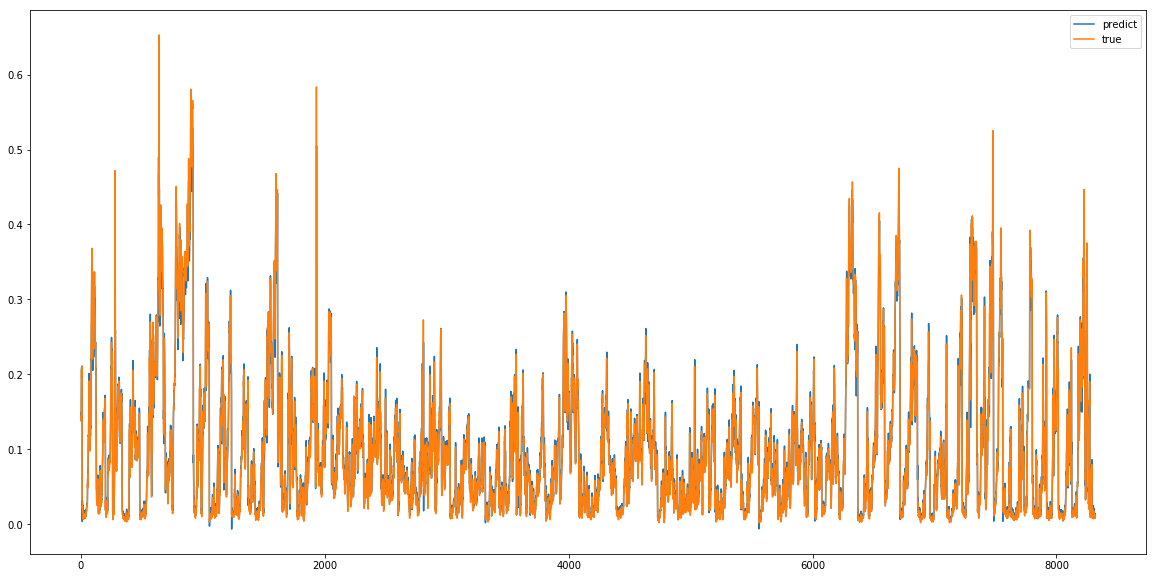

In [24]:
yhat = full_model.predict(testX)

plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [25]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1,1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [26]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 20.296


### convlstm + Attention

In [75]:
first_input = Input(shape=(7,1))

in1=Conv1D(filters=256, kernel_size=4, activation='relu', input_shape=(6, 1))(first_input)
#in1= BatchNormalization(scale=False)(in1)

in1=Conv1D(filters=256, kernel_size=3, activation='relu')(in1)
#in1= BatchNormalization(scale=False)(in1)

in1=Conv1D(filters=128, kernel_size=1, activation='relu')(in1)
in1=MaxPooling1D(pool_size=2)(in1)
in1=TimeDistributed(Flatten())(in1)
#model.add(LSTM(units = 128, return_sequences=True))
lstm_out=Bidirectional(LSTM(units =150 , return_sequences=True,recurrent_dropout=0.3))(in1)
lstm_out=Bidirectional(LSTM(units =150 , return_sequences=True,recurrent_dropout=0.3))(lstm_out)

attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([lstm_out, lstm_out])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
concat_out = Concatenate(axis=-1, name='concat_layer')([lstm_out, attn_out])
flat_out = Flatten()(concat_out)
#out1=Dense(20, activation='relu')(flat_out)
#model.add(Dropout(drop_dense))
out1=Dense(1, activation = 'linear')(flat_out)
model=Model(inputs=first_input, outputs=out1)
model.compile(optimizer='adam', loss='mse')

checkpoint_path = "saved_weights/multi_Bahdanau_pm2.5_convlstmattn.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

# fit model9
history=model.fit(trainX, trainY, epochs=1000, batch_size=100, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[cb])

Train on 35490 samples, validate on 8320 samples
Epoch 1/1000
35100/35490 [============================>.] - ETA: 0s - loss: 0.0017
Epoch 00001: val_loss improved from inf to 0.00065, saving model to saved_weights/multi_Bahdanau_pm2.5_convlstmattn.hdf5
35490/35490 [==============================] - 10s 273us/sample - loss: 0.0017 - val_loss: 6.5086e-04
Epoch 2/1000
35100/35490 [============================>.] - ETA: 0s - loss: 8.9921e-04
Epoch 00002: val_loss improved from 0.00065 to 0.00055, saving model to saved_weights/multi_Bahdanau_pm2.5_convlstmattn.hdf5
35490/35490 [==============================] - 4s 115us/sample - loss: 9.0717e-04 - val_loss: 5.4882e-04
Epoch 3/1000
35100/35490 [============================>.] - ETA: 0s - loss: 7.7504e-04
Epoch 00003: val_loss improved from 0.00055 to 0.00052, saving model to saved_weights/multi_Bahdanau_pm2.5_convlstmattn.hdf5
35490/35490 [==============================] - 4s 115us/sample - loss: 7.8294e-04 - val_loss: 5.2168e-04
Epoch 4/100

Epoch 30/1000
35100/35490 [============================>.] - ETA: 0s - loss: 6.1119e-04
Epoch 00030: val_loss did not improve from 0.00043
35490/35490 [==============================] - 4s 113us/sample - loss: 6.1943e-04 - val_loss: 4.4892e-04
Epoch 31/1000
35100/35490 [============================>.] - ETA: 0s - loss: 5.8678e-04
Epoch 00031: val_loss did not improve from 0.00043
35490/35490 [==============================] - 4s 113us/sample - loss: 5.9470e-04 - val_loss: 4.4319e-04
Epoch 32/1000
35100/35490 [============================>.] - ETA: 0s - loss: 5.9264e-04
Epoch 00032: val_loss did not improve from 0.00043
35490/35490 [==============================] - 4s 113us/sample - loss: 6.0057e-04 - val_loss: 4.5493e-04
Epoch 33/1000
35100/35490 [============================>.] - ETA: 0s - loss: 5.8280e-04
Epoch 00033: val_loss did not improve from 0.00043
35490/35490 [==============================] - 4s 113us/sample - loss: 5.9093e-04 - val_loss: 4.4775e-04
Epoch 34/1000
35100/3549

35400/35490 [============================>.] - ETA: 0s - loss: 5.1883e-04
Epoch 00096: val_loss did not improve from 0.00042
35490/35490 [==============================] - 5s 152us/sample - loss: 5.2597e-04 - val_loss: 4.2526e-04
Epoch 97/1000
35300/35490 [============================>.] - ETA: 0s - loss: 5.5004e-04
Epoch 00097: val_loss did not improve from 0.00042
35490/35490 [==============================] - 5s 152us/sample - loss: 5.5731e-04 - val_loss: 4.4000e-04
Epoch 98/1000
35100/35490 [============================>.] - ETA: 0s - loss: 5.4733e-04
Epoch 00098: val_loss did not improve from 0.00042
35490/35490 [==============================] - 5s 152us/sample - loss: 5.5290e-04 - val_loss: 4.3249e-04
Epoch 99/1000
35100/35490 [============================>.] - ETA: 0s - loss: 5.2916e-04
Epoch 00099: val_loss did not improve from 0.00042
35490/35490 [==============================] - 5s 153us/sample - loss: 5.3458e-04 - val_loss: 4.3340e-04
Epoch 100/1000
35400/35490 [==========

Epoch 130/1000
35100/35490 [============================>.] - ETA: 0s - loss: 4.9915e-04
Epoch 00130: val_loss did not improve from 0.00042
35490/35490 [==============================] - 4s 113us/sample - loss: 5.0575e-04 - val_loss: 4.3608e-04
Epoch 131/1000
35100/35490 [============================>.] - ETA: 0s - loss: 5.1529e-04
Epoch 00131: val_loss did not improve from 0.00042
35490/35490 [==============================] - 4s 113us/sample - loss: 5.1998e-04 - val_loss: 4.3990e-04
Epoch 132/1000
35100/35490 [============================>.] - ETA: 0s - loss: 4.9062e-04
Epoch 00132: val_loss did not improve from 0.00042
35490/35490 [==============================] - 4s 113us/sample - loss: 4.9599e-04 - val_loss: 4.3226e-04
Epoch 133/1000
35100/35490 [============================>.] - ETA: 0s - loss: 4.9601e-04
Epoch 00133: val_loss did not improve from 0.00042
35490/35490 [==============================] - 4s 113us/sample - loss: 5.0121e-04 - val_loss: 4.3237e-04
Epoch 134/1000
35100

KeyboardInterrupt: 

In [73]:
history=model.fit(trainX, trainY, epochs=100, batch_size=100, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[cb])

Train on 35490 samples, validate on 8320 samples
Epoch 1/100
35100/35490 [============================>.] - ETA: 0s - loss: 4.3135e-04
Epoch 00001: val_loss did not improve from 0.00042
35490/35490 [==============================] - 3s 82us/sample - loss: 4.3413e-04 - val_loss: 4.8257e-04
Epoch 2/100
35100/35490 [============================>.] - ETA: 0s - loss: 4.1062e-04
Epoch 00002: val_loss did not improve from 0.00042
35490/35490 [==============================] - 3s 81us/sample - loss: 4.1416e-04 - val_loss: 4.8926e-04
Epoch 3/100
35100/35490 [============================>.] - ETA: 0s - loss: 4.0918e-04
Epoch 00003: val_loss did not improve from 0.00042
35490/35490 [==============================] - 3s 81us/sample - loss: 4.1222e-04 - val_loss: 4.8373e-04
Epoch 4/100
35100/35490 [============================>.] - ETA: 0s - loss: 4.0309e-04
Epoch 00004: val_loss did not improve from 0.00042
35490/35490 [==============================] - 3s 82us/sample - loss: 4.0610e-04 - val_loss

KeyboardInterrupt: 

In [67]:
model.load_weights('saved_weights/multi_Bahdanau_pm2.5_convlstmattn.hdf5')

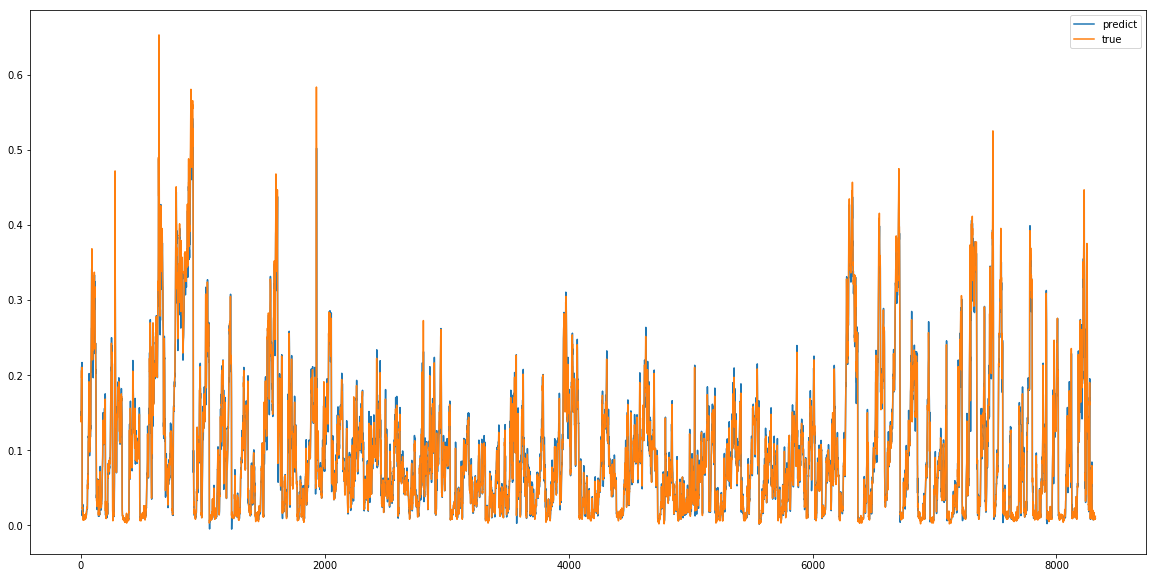

In [68]:
yhat = model.predict(testX)

plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [69]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1,1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [65]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 20.101


In [70]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 20.395


In [332]:
first_input = Input(shape=(7,1))
in1=layers.Conv1D(filters=256, kernel_size=4, activation='relu', input_shape=(6, 1))(first_input)
in2=layers.Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(6, 1))(in1)
in3=layers.Conv1D(filters=128, kernel_size=1, activation='relu')(in2)
in4=layers.MaxPooling1D(pool_size=2)(in3)
in5=layers.Flatten()(in4)
in6=layers.Dense(100)(in5)
in6=layers.Dense(1)(in6)
#in6=layers.Bidirectional(LSTM(50))(first_input)

inputs = Input(shape=(7, 1), name='inputs')
lstm_out = Bidirectional(LSTM(200, return_sequences=True))(inputs)
#lstm_out = Bidirectional(LSTM(100, return_sequences=True))(lstm_out1)

#lstm_out = LSTM(64, return_sequences=True)(lstm_out)

    # Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([lstm_out, lstm_out])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
concat_out = Concatenate(axis=-1, name='concat_layer')([lstm_out, attn_out])
flat_out = Flatten()(concat_out)

    # Dense layer
#dense_out = Dense(6, activation='relu')(flat_out)
concat=layers.Concatenate()([in6, flat_out])
#dens=layers.Dense(100,activation='relu')(concat)
#dens=layers.Dense(100)
#dens= SeqSelfAttention(attention_activation='relu')(concat)

dens=layers.Dense(1)(concat)

model=tf.keras.Model(inputs=[first_input,inputs],outputs=[dens])
model.compile(optimizer='adam', loss='mse')


In [333]:
checkpoint_path = "saved_weights/multi_Bahdanau_pm2.5.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

In [334]:
hist = model.fit([trainX,trainX],trainY,batch_size=32,epochs = 150,validation_data=([testX,testX],testY), verbose = 1,callbacks=[cb])

Train on 35052 samples, validate on 8758 samples
Epoch 1/150
34976/35052 [============================>.] - ETA: 0s - loss: 8.7062e-04
Epoch 00001: val_loss improved from inf to 0.00069, saving model to saved_weights/multi_Bahdanau_pm2.5.hdf5
35052/35052 [==============================] - 22s 618us/sample - loss: 8.7095e-04 - val_loss: 6.9332e-04
Epoch 2/150
35008/35052 [============================>.] - ETA: 0s - loss: 6.2016e-04
Epoch 00002: val_loss improved from 0.00069 to 0.00054, saving model to saved_weights/multi_Bahdanau_pm2.5.hdf5
35052/35052 [==============================] - 19s 552us/sample - loss: 6.2009e-04 - val_loss: 5.4005e-04
Epoch 3/150
34976/35052 [============================>.] - ETA: 0s - loss: 6.0560e-04
Epoch 00003: val_loss improved from 0.00054 to 0.00051, saving model to saved_weights/multi_Bahdanau_pm2.5.hdf5
35052/35052 [==============================] - 18s 527us/sample - loss: 6.0513e-04 - val_loss: 5.1169e-04
Epoch 4/150
34976/35052 [==================

Epoch 32/150
34976/35052 [============================>.] - ETA: 0s - loss: 5.4940e-04
Epoch 00032: val_loss did not improve from 0.00045
35052/35052 [==============================] - 18s 525us/sample - loss: 5.5048e-04 - val_loss: 5.1517e-04
Epoch 33/150
34976/35052 [============================>.] - ETA: 0s - loss: 5.5315e-04
Epoch 00033: val_loss did not improve from 0.00045
35052/35052 [==============================] - 18s 525us/sample - loss: 5.5277e-04 - val_loss: 4.6986e-04
Epoch 34/150
34944/35052 [============================>.] - ETA: 0s - loss: 5.4998e-04
Epoch 00034: val_loss did not improve from 0.00045
35052/35052 [==============================] - 18s 525us/sample - loss: 5.4943e-04 - val_loss: 5.0431e-04
Epoch 35/150
34976/35052 [============================>.] - ETA: 0s - loss: 5.5177e-04
Epoch 00035: val_loss did not improve from 0.00045
35052/35052 [==============================] - 18s 524us/sample - loss: 5.5095e-04 - val_loss: 4.7828e-04
Epoch 36/150
34976/35052

34944/35052 [============================>.] - ETA: 0s - loss: 5.3453e-04
Epoch 00098: val_loss did not improve from 0.00045
35052/35052 [==============================] - 18s 526us/sample - loss: 5.3472e-04 - val_loss: 4.5333e-04
Epoch 99/150
34976/35052 [============================>.] - ETA: 0s - loss: 5.3798e-04
Epoch 00099: val_loss did not improve from 0.00045
35052/35052 [==============================] - 18s 525us/sample - loss: 5.3746e-04 - val_loss: 4.5732e-04
Epoch 100/150
34944/35052 [============================>.] - ETA: 0s - loss: 5.3715e-04
Epoch 00100: val_loss improved from 0.00045 to 0.00045, saving model to saved_weights/multi_Bahdanau_pm2.5.hdf5
35052/35052 [==============================] - 18s 527us/sample - loss: 5.3702e-04 - val_loss: 4.4849e-04
Epoch 101/150
34976/35052 [============================>.] - ETA: 0s - loss: 5.3614e-04
Epoch 00101: val_loss did not improve from 0.00045
35052/35052 [==============================] - 18s 525us/sample - loss: 5.3570e-

34944/35052 [============================>.] - ETA: 0s - loss: 5.3239e-04
Epoch 00131: val_loss did not improve from 0.00045
35052/35052 [==============================] - 18s 525us/sample - loss: 5.3246e-04 - val_loss: 4.5749e-04
Epoch 132/150
34976/35052 [============================>.] - ETA: 0s - loss: 5.3271e-04
Epoch 00132: val_loss did not improve from 0.00045
35052/35052 [==============================] - 18s 525us/sample - loss: 5.3311e-04 - val_loss: 4.5310e-04
Epoch 133/150
34976/35052 [============================>.] - ETA: 0s - loss: 5.3897e-04
Epoch 00133: val_loss did not improve from 0.00045
35052/35052 [==============================] - 18s 525us/sample - loss: 5.3845e-04 - val_loss: 4.5580e-04
Epoch 134/150
34976/35052 [============================>.] - ETA: 0s - loss: 5.3610e-04
Epoch 00134: val_loss did not improve from 0.00045
35052/35052 [==============================] - 18s 525us/sample - loss: 5.3641e-04 - val_loss: 4.5791e-04
Epoch 135/150
34976/35052 [=======

In [335]:
model.load_weights('saved_weights/multi_Bahdanau_pm2.5.hdf5')

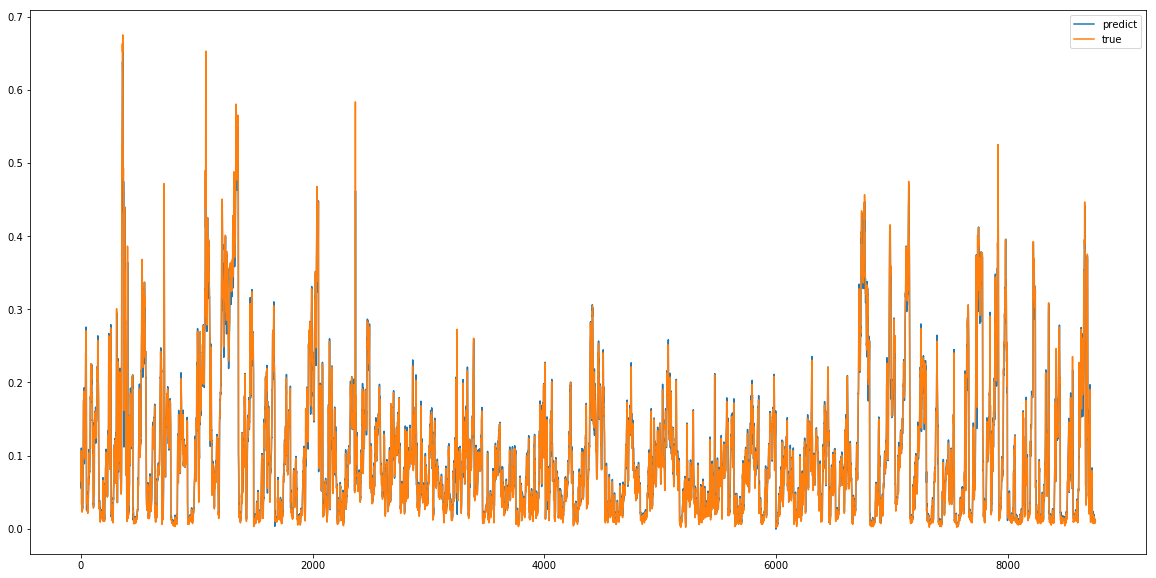

In [336]:
yhat = model.predict([testX,testX])

plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [337]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1,1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [338]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 21.008


### Aug

(<Figure size 1152x144 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdcbe2f7fd0>)

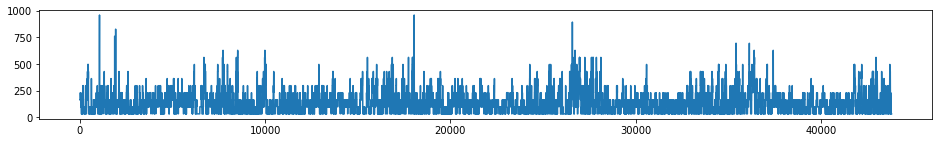

In [683]:
from tsaug.visualization import plot
from tsaug import TimeWarp, Crop, Quantize, Drift, Reverse

my_augmenter = Quantize(n_levels=[5,10,15])
X_aug= my_augmenter.augment(data['pm2.5'].values)
plot(X_aug)

(<Figure size 1152x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdde005c438>,
       dtype=object))

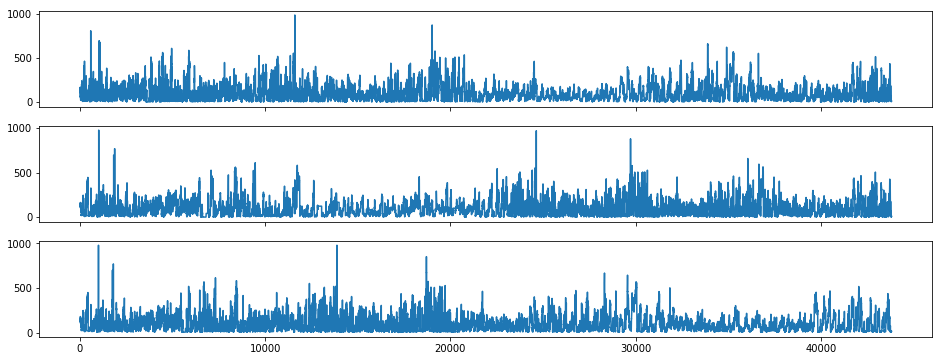

In [29]:
my_augmenter =TimeWarp()*3
X_aug1= my_augmenter.augment(data['pm2.5'].values)
plot(X_aug1)

In [42]:
X_aug1[0]

array([129.        , 129.        , 129.        , ...,   9.92324654,
         8.07671038,  12.        ])

In [32]:
train_size = int(len(scaled) * 0.81)
val_size = len(scaled) - train_size

test_size = len(scaled) - train_size
train2, test2 = time[0:train_size,:], time[train_size:len(scaled),:]
print(len(train2), len(test2))

35497 8327


In [33]:
look_back = 7
trainX2, trainY2 = create_dataset(train2, look_back)
#valX, valY = create_dataset(val, look_back)
testX2, testY2 = create_dataset(test2, look_back)

35490
8320


In [34]:
trainX2 = np.reshape(trainX2, (trainX2.shape[0], trainX2.shape[1], 1))
#valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))
testX2 = np.reshape(testX2, (testX2.shape[0],testX2.shape[1], 1 ))

In [128]:
first_input = Input(shape=(7,1))
in1=layers.Conv1D(filters=256, kernel_size=4, activation='relu', input_shape=(6, 1))(first_input)
in2=layers.Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(6, 1))(in1)
in3=layers.Conv1D(filters=128, kernel_size=1, activation='relu')(in2)
in4=layers.MaxPooling1D(pool_size=2)(in3)
in5=layers.Flatten()(in4)
in6=layers.Dense(100)(in5)
in6=layers.Dense(1)(in6)
#in6=layers.Bidirectional(LSTM(50))(first_input)

inputs = Input(shape=(7, 1), name='inputs')
lstm_out = Bidirectional(LSTM(200, return_sequences=True))(inputs)
#lstm_out = LSTM(64, return_sequences=True)(lstm_out)

    # Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([lstm_out, lstm_out])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
concat_out = Concatenate(axis=-1, name='concat_layer')([lstm_out, attn_out])
flat_out = Flatten()(concat_out)

    # Dense layer
#dense_out = Dense(6, activation='relu')(flat_out)
concat=layers.Concatenate()([in6, flat_out])
#dens=layers.Dense(100,activation='relu')(concat)
#dens=layers.Dense(100)
#dens= SeqSelfAttention(attention_activation='relu')(concat)

dens=layers.Dense(1)(concat)

model=tf.keras.Model(inputs=[first_input,inputs],outputs=[dens])
model.compile(optimizer='adam', loss='mse')


In [129]:
checkpoint_path = "saved_weights/multi_Bahdanau_pm2.5_Aug_timewarp.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

In [130]:
hist = model.fit([trainX2,trainX],trainY, epochs = 100,validation_data=([testX2,testX],testY), verbose = 1,callbacks=[cb])

Train on 35490 samples, validate on 8320 samples
Epoch 1/100
35488/35490 [============================>.] - ETA: 0s - loss: 9.0210e-04
Epoch 00001: val_loss improved from inf to 0.00053, saving model to saved_weights/multi_Bahdanau_pm2.5_Aug_timewarp.hdf5
35490/35490 [==============================] - 24s 662us/sample - loss: 9.0207e-04 - val_loss: 5.2956e-04
Epoch 2/100
35456/35490 [============================>.] - ETA: 0s - loss: 6.1190e-04
Epoch 00002: val_loss improved from 0.00053 to 0.00044, saving model to saved_weights/multi_Bahdanau_pm2.5_Aug_timewarp.hdf5
35490/35490 [==============================] - 19s 524us/sample - loss: 6.1154e-04 - val_loss: 4.4455e-04
Epoch 3/100
35488/35490 [============================>.] - ETA: 0s - loss: 6.0930e-04
Epoch 00003: val_loss did not improve from 0.00044
35490/35490 [==============================] - 19s 522us/sample - loss: 6.0926e-04 - val_loss: 4.9897e-04
Epoch 4/100
35456/35490 [============================>.] - ETA: 0s - loss: 6.0

Epoch 64/100
35424/35490 [============================>.] - ETA: 0s - loss: 5.5340e-04
Epoch 00064: val_loss did not improve from 0.00042
35490/35490 [==============================] - 19s 523us/sample - loss: 5.5324e-04 - val_loss: 4.2491e-04
Epoch 65/100
35488/35490 [============================>.] - ETA: 0s - loss: 5.5064e-04
Epoch 00065: val_loss did not improve from 0.00042
35490/35490 [==============================] - 19s 522us/sample - loss: 5.5065e-04 - val_loss: 4.3385e-04
Epoch 66/100
35488/35490 [============================>.] - ETA: 0s - loss: 5.5235e-04
Epoch 00066: val_loss did not improve from 0.00042
35490/35490 [==============================] - 19s 522us/sample - loss: 5.5232e-04 - val_loss: 4.2049e-04
Epoch 67/100
35456/35490 [============================>.] - ETA: 0s - loss: 5.5147e-04
Epoch 00067: val_loss did not improve from 0.00042
35490/35490 [==============================] - 19s 523us/sample - loss: 5.5262e-04 - val_loss: 4.5381e-04
Epoch 68/100
35488/35490

In [131]:
model.load_weights("saved_weights/multi_Bahdanau_pm2.5_Aug_timewarp.hdf5")

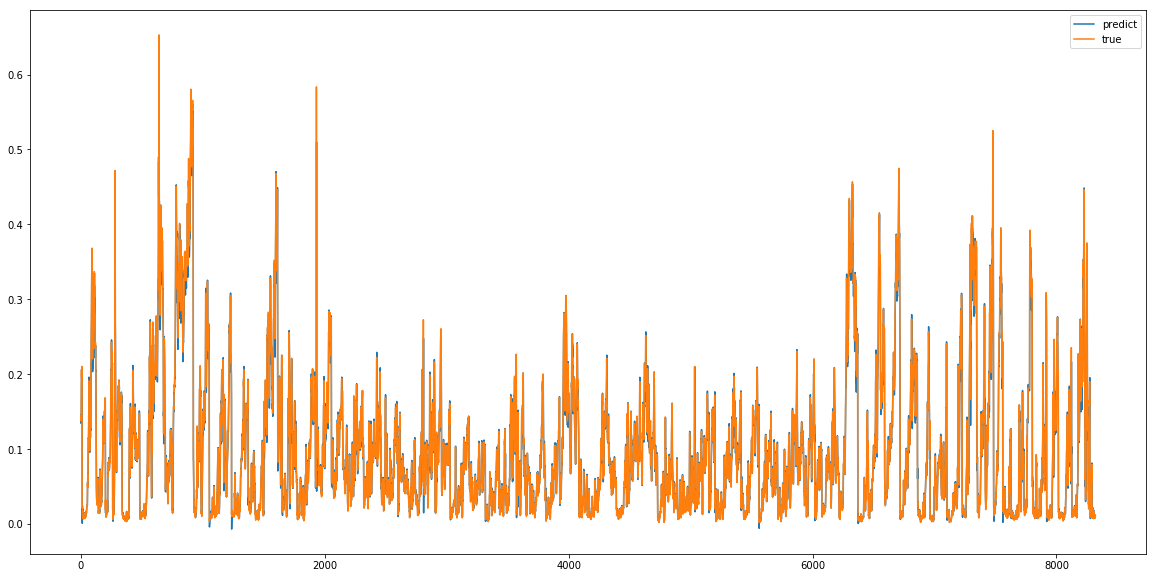

In [132]:
from matplotlib import *

plt.figure(figsize=(20,10))

yhat = model.predict([testX1,testX])
yhat=yhat.reshape(-1,1)
y_test1=testY.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(y_test1, label='true')
pyplot.legend()
pyplot.show()

In [133]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1,1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [110]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 18.838


In [118]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 18.811


In [134]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 19.946


In [169]:
print(trainX_aug.shape)
print(trainX.shape)

(35490, 7, 4)
(35490, 7, 1)


In [170]:
print(testX_aug.shape)
print(testX.shape)

(8320, 7, 4)
(8320, 7, 1)


In [1077]:
first_input = Input(shape=(7,1))
in1=layers.Conv1D(filters=256, kernel_size=4, activation='relu', input_shape=(6, 1))(first_input)
in2=layers.Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(6, 1))(in1)
in3=layers.Conv1D(filters=128, kernel_size=1, activation='relu')(in2)
in4=layers.MaxPooling1D(pool_size=2)(in3)
in5=layers.Flatten()(in4)
in6=layers.Dense(100)(in5)
in6=layers.Dense(1)(in6)
#in6=layers.Bidirectional(LSTM(50))(first_input)

inputs = Input(shape=(7, 1), name='inputs')
lstm_out = Bidirectional(LSTM(200, return_sequences=True))(inputs)
#lstm_out = LSTM(64, return_sequences=True)(lstm_out)

    # Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([lstm_out, lstm_out])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
concat_out = Concatenate(axis=-1, name='concat_layer')([lstm_out, attn_out])
flat_out = Flatten()(concat_out)

    # Dense layer
#dense_out = Dense(6, activation='relu')(flat_out)
concat=layers.Concatenate()([in6, flat_out])
#dens=layers.Dense(100,activation='relu')(concat)
#dens=layers.Dense(100)
#dens= SeqSelfAttention(attention_activation='relu')(concat)

dens=layers.Dense(1)(concat)

model=tf.keras.Model(inputs=[first_input,inputs],outputs=[dens])
model.compile(optimizer='adam', loss='mse')


In [39]:
checkpoint_path = "saved_weights/multi_Bahdanau_pm2.5_Aug_timewarp_multivar.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

In [62]:
hist = model.fit([trainX_aug,trainX],trainY, epochs = 100,validation_data=([testX_aug,testX],testY), verbose = 1,callbacks=[cb])

Train on 35490 samples, validate on 8320 samples
Epoch 1/100
35488/35490 [============================>.] - ETA: 0s - loss: 5.9729e-04
Epoch 00001: val_loss did not improve from 0.00043
35490/35490 [==============================] - 19s 527us/sample - loss: 5.9725e-04 - val_loss: 4.6091e-04
Epoch 2/100
35456/35490 [============================>.] - ETA: 0s - loss: 5.9706e-04
Epoch 00002: val_loss did not improve from 0.00043
35490/35490 [==============================] - 19s 529us/sample - loss: 5.9715e-04 - val_loss: 5.6238e-04
Epoch 3/100
35424/35490 [============================>.] - ETA: 0s - loss: 5.9589e-04
Epoch 00003: val_loss did not improve from 0.00043
35490/35490 [==============================] - 19s 530us/sample - loss: 5.9533e-04 - val_loss: 4.6662e-04
Epoch 4/100
35424/35490 [============================>.] - ETA: 0s - loss: 5.9785e-04
Epoch 00004: val_loss did not improve from 0.00043
35490/35490 [==============================] - 19s 531us/sample - loss: 5.9732e-04 - 

35424/35490 [============================>.] - ETA: 0s - loss: 5.4172e-04
Epoch 00033: val_loss did not improve from 0.00041
35490/35490 [==============================] - 19s 528us/sample - loss: 5.4216e-04 - val_loss: 4.4834e-04
Epoch 34/100
35392/35490 [============================>.] - ETA: 0s - loss: 5.4544e-04
Epoch 00034: val_loss did not improve from 0.00041
35490/35490 [==============================] - 19s 533us/sample - loss: 5.4495e-04 - val_loss: 4.4419e-04
Epoch 35/100
35456/35490 [============================>.] - ETA: 0s - loss: 5.3988e-04
Epoch 00035: val_loss did not improve from 0.00041
35490/35490 [==============================] - 19s 531us/sample - loss: 5.4130e-04 - val_loss: 6.0154e-04
Epoch 36/100
35392/35490 [============================>.] - ETA: 0s - loss: 5.5475e-04
Epoch 00036: val_loss did not improve from 0.00041
35490/35490 [==============================] - 19s 532us/sample - loss: 5.5468e-04 - val_loss: 4.3785e-04
Epoch 37/100
35392/35490 [===========

Epoch 66/100
35392/35490 [============================>.] - ETA: 0s - loss: 5.2768e-04
Epoch 00066: val_loss did not improve from 0.00041
35490/35490 [==============================] - 19s 527us/sample - loss: 5.2889e-04 - val_loss: 4.5520e-04
Epoch 67/100
35392/35490 [============================>.] - ETA: 0s - loss: 5.3097e-04
Epoch 00067: val_loss did not improve from 0.00041
35490/35490 [==============================] - 19s 531us/sample - loss: 5.3085e-04 - val_loss: 4.1869e-04
Epoch 68/100
35424/35490 [============================>.] - ETA: 0s - loss: 5.2811e-04
Epoch 00068: val_loss did not improve from 0.00041
35490/35490 [==============================] - 19s 533us/sample - loss: 5.2787e-04 - val_loss: 4.1106e-04
Epoch 69/100
35424/35490 [============================>.] - ETA: 0s - loss: 5.2840e-04
Epoch 00069: val_loss did not improve from 0.00041
35490/35490 [==============================] - 19s 540us/sample - loss: 5.2846e-04 - val_loss: 4.2106e-04
Epoch 70/100
35392/35490

In [1078]:
model.load_weights("saved_weights/multi_Bahdanau_pm2.5_Aug_timewarp_multivar.hdf5")

In [1079]:
from matplotlib import *

plt.figure(figsize=(20,10))

yhat = model.predict([testX_aug,testX])
yhat=yhat.reshape(-1,1)
y_test1=testY.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(y_test1, label='true')
pyplot.legend()
pyplot.show()

ValueError: Error when checking input: expected input_110 to have shape (7, 5) but got array with shape (24, 1)

<Figure size 1440x720 with 0 Axes>

In [65]:
yhat_inverse = yhat*(np.max(values_aug)-np.min(values_aug))+np.min(values_aug)

In [66]:
testY_inverse=testY*(np.max(values_aug)-np.min(values_aug))+np.min(values_aug)

In [67]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 21.863


### resconv1d

In [1384]:
first_input = Input(shape=(48,11))

in1=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same', input_shape=(24, 1))(first_input)
in1= BatchNormalization(scale=False)(in1)

in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
in1= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#n1=add([in0,in1],name='extractor')
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
in1=MaxPooling1D(pool_size=2)(concat_out)
in1=Flatten()(in1)
in1=Dense(100, activation='relu')(in1)
out=Dense(1)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

checkpoint_path = "saved_weights/res_conv1d_attn.hdf5"

cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

# fit model
model.fit(trainX, trainY,validation_data=[valX,valY], epochs=200, verbose=1,callbacks=[cb])

Train on 35011 samples, validate on 4334 samples
Epoch 1/200
34976/35011 [============================>.] - ETA: 0s - loss: 0.2489
Epoch 00001: val_loss improved from inf to 0.15353, saving model to saved_weights/res_conv1d_attn.hdf5
35011/35011 [==============================] - 34s 968us/sample - loss: 0.2488 - val_loss: 0.1535
Epoch 2/200
34976/35011 [============================>.] - ETA: 0s - loss: 0.1447
Epoch 00002: val_loss did not improve from 0.15353
35011/35011 [==============================] - 32s 919us/sample - loss: 0.1447 - val_loss: 0.1544
Epoch 3/200
34976/35011 [============================>.] - ETA: 0s - loss: 0.1435
Epoch 00003: val_loss improved from 0.15353 to 0.15235, saving model to saved_weights/res_conv1d_attn.hdf5
35011/35011 [==============================] - 32s 916us/sample - loss: 0.1435 - val_loss: 0.1523
Epoch 4/200
34976/35011 [============================>.] - ETA: 0s - loss: 0.1430
Epoch 00004: val_loss did not improve from 0.15235
35011/35011 [====

KeyboardInterrupt: 

In [696]:
model.summary()

Model: "model_33570"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_51 (InputLayer)           [(None, 24, 1)]      0                                            
__________________________________________________________________________________________________
conv1d_134 (Conv1D)             (None, 24, 64)       384         input_51[0][0]                   
__________________________________________________________________________________________________
batch_normalization_6 (BatchNor (None, 24, 64)       192         conv1d_134[0][0]                 
__________________________________________________________________________________________________
conv1d_135 (Conv1D)             (None, 24, 64)       12352       batch_normalization_6[0][0]      
________________________________________________________________________________________

In [1092]:
model.load_weights("saved_weights/res_conv1d2.hdf5")

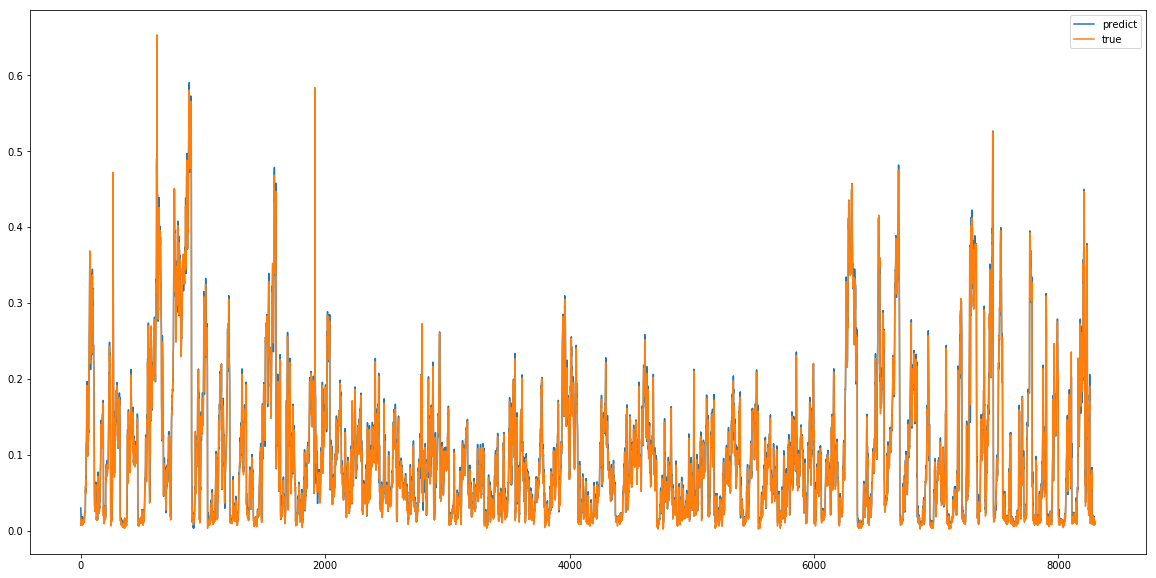

In [1093]:
from matplotlib import pyplot
yhat = model.predict([testX])

plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [650]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1,1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [1094]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.02030


In [651]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 20.176


In [593]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 20.048


In [599]:
def gradient_importance(seq, model):

    seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)

    with tf.GradientTape() as tape:
        predictions = model(seq)

    grads = tape.gradient(predictions, seq)
    grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
    return grads



def activation_grad(seq, model):
    
    seq = seq[np.newaxis,:,:]
    grad_model = Model([model.inputs], 
                       [model.get_layer('extractor').output, 
                        model.output])

    # Obtain the predicted value and the intermediate filters
    with tf.GradientTape() as tape:
        seq_outputs, predictions = grad_model(seq)

    # Extract filters and gradients
    output = seq_outputs[0]
    grads = tape.gradient(predictions, seq_outputs)[0]

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=0)
    
    # Get a ponderated map of filters according to grad importance
    cam = np.ones(output.shape[0], dtype=np.float32)
    for index, w in enumerate(weights):
        cam += w * output[:, index]

    time = int(seq.shape[1]/output.shape[0])
    cam = zoom(cam.numpy(), time, order=1)
    heatmap = (cam - cam.min())/(cam.max() - cam.min())
    
    return heatmap

In [604]:

a=[]
for i in range(24):
    a.append(i)

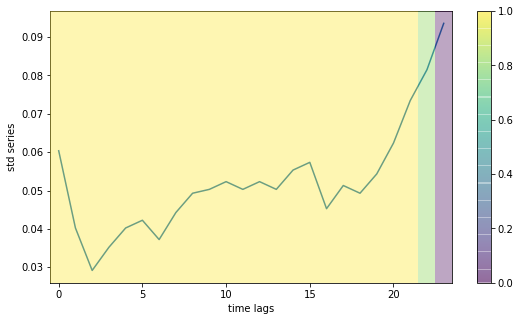

In [667]:
from scipy.ndimage import zoom
import random
id_=random.randint(0,len(testX))


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)

plt.figure(figsize=(9,5))
plt.plot(X_test[id_])
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('std series'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*30), alpha=0.35)
plt.axis('off'); plt.colorbar()
np.set_printoptions(False)

In [677]:
for l in range(4):
    activation = activation_grad(X_test[l], model)
    act_list= activation.tolist()
    activation+=activation
    
    act+=act_list

In [679]:
activation

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### res1D

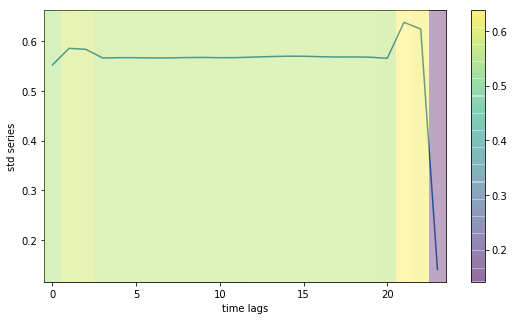

In [681]:
for l in range(len(testX)):
    activation = activation_grad(X_test[l], model)
    act_list= activation.tolist()
    act+=act_list
    activation=act/len(X_test)
plt.figure(figsize=(9,5))
plt.plot(activation)
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('std series'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*30), alpha=0.35)
plt.axis('off'); plt.colorbar()
np.set_printoptions(False)
    

In [614]:
activation = activation_grad(X_test[1], model)

In [618]:
a=activation+activation
a/2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### nasdaq

In [1288]:
data = pd.read_csv("nasdaq100_padding.csv")
data

,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,AMGN,...,TXN,VIAB,VOD,VRTX,WBA,WDC,WFM,XLNX,YHOO,NDX
0,35.9800,96.800,97.80,61.1500,95.4000,58.180000,58.00,127.0400,26.6800,165.8100,...,70.7300,45.2300,31.1701,95.2700,81.365,52.160,33.95,48.6100,38.0100,4665.054
1,35.9310,96.890,97.80,61.6100,95.4115,58.190000,58.12,126.0600,26.7300,165.9101,...,70.6900,45.0100,31.1900,94.1700,81.540,52.150,34.10,48.7400,38.1400,4665.054
2,35.9044,96.950,97.57,61.9800,95.5100,58.203333,57.95,126.5100,26.7120,166.1800,...,71.3000,45.0150,31.2100,94.7490,81.530,52.270,34.01,48.9900,38.1500,4665.826
3,35.8900,96.970,97.55,62.0900,95.5200,58.216667,57.96,126.2800,26.7400,166.1480,...,71.3100,45.0200,31.2100,94.3100,81.710,52.300,33.96,48.9500,38.1950,4667.081
4,36.0080,96.960,97.73,61.8900,95.5300,58.230000,58.21,126.5850,26.7200,165.9900,...,71.0600,45.0500,31.1800,94.1550,81.720,52.300,34.17,48.8900,38.3200,4664.491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40555,48.5030,115.880,104.19,73.2895,102.2900,74.690000,67.39,121.1264,32.9200,146.3911,...,73.8100,34.8100,24.7550,72.1400,84.330,70.230,32.04,59.9200,38.5300,4921.811
40556,48.5150,115.875,104.18,73.2900,102.3100,74.675000,67.43,121.2000,32.9300,146.3951,...,73.8100,34.7950,24.7597,72.0928,84.340,70.220,32.03,59.9290,38.5100,4921.580
40557,48.5300,115.875,104.15,73.2850,102.3200,74.680000,67.40,121.3500,32.9064,146.3700,...,73.8001,34.7901,24.7571,72.0600,84.350,70.165,32.03,59.9345,38.5084,4921.884
40558,48.5600,115.920,104.19,73.3000,102.3100,74.750000,67.35,121.3000,32.9200,146.3400,...,73.8101,34.8200,24.7500,72.0950,84.320,70.210,32.04,59.9400,38.5050,4922.949


In [1289]:
data.columns

Index(['AAL', 'AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'ALXN', 'AMAT',
       'AMGN', 'AMZN', 'ATVI', 'AVGO', 'BBBY', 'BIDU', 'BIIB', 'CA', 'CELG',
       'CERN', 'CMCSA', 'COST', 'CSCO', 'CSX', 'CTRP', 'CTSH', 'DISCA', 'DISH',
       'DLTR', 'EA', 'EBAY', 'ESRX', 'EXPE', 'FAST', 'FB', 'FOX', 'FOXA',
       'GILD', 'GOOGL', 'INTC', 'JD', 'KHC', 'LBTYA', 'LBTYK', 'LRCX', 'MAR',
       'MAT', 'MCHP', 'MDLZ', 'MSFT', 'MU', 'MXIM', 'MYL', 'NCLH', 'NFLX',
       'NTAP', 'NVDA', 'NXPI', 'PAYX', 'PCAR', 'PYPL', 'QCOM', 'QVCA', 'ROST',
       'SBUX', 'SIRI', 'STX', 'SWKS', 'SYMC', 'TMUS', 'TRIP', 'TSCO', 'TSLA',
       'TXN', 'VIAB', 'VOD', 'VRTX', 'WBA', 'WDC', 'WFM', 'XLNX', 'YHOO',
       'NDX'],
      dtype='object')

In [1315]:
def create_dataset_mul(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back, -1])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [1316]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler
scaled = data[data.columns].values.reshape(-1,82)
scaled = scaled.astype('float32')
#scaler = MinMaxScaler(feature_range=(1, 100))
#scaler=RobustScaler()
#scaled = scaler.fit_transform(scaled)

In [1306]:
scaled


array([[  36.,   97.,   98., ...,   49.,   38., 4665.],
       [  36.,   97.,   98., ...,   49.,   38., 4665.],
       [  36.,   97.,   98., ...,   49.,   38., 4666.],
       ...,
       [  49.,  116.,  104., ...,   60.,   39., 4922.],
       [  49.,  116.,  104., ...,   60.,   39., 4923.],
       [  49.,  116.,  104., ...,   60.,   39., 4923.]], dtype=float32)

In [1317]:
train_size = int(len(scaled) * 0.7)

val_size = int(len(scaled) * 0.15)

test_size = len(scaled) - train_size- val_size
train,val, test = scaled[0:train_size,:], scaled[train_size:,:],scaled[train_size+val_size:len(scaled),:]
print(len(train),len(val), len(test))

28392 12168 6084


In [1318]:
test

array([[  47.,  111.,  103., ...,   54.,   41., 4819.],
       [  47.,  111.,  103., ...,   54.,   41., 4818.],
       [  47.,  111.,  103., ...,   54.,   41., 4819.],
       ...,
       [  49.,  116.,  104., ...,   60.,   39., 4922.],
       [  49.,  116.,  104., ...,   60.,   39., 4923.],
       [  49.,  116.,  104., ...,   60.,   39., 4923.]], dtype=float32)

In [1319]:
look_back = 10
trainX, trainY = create_dataset_mul(train, look_back)
valX, valY = create_dataset_mul(val, look_back)
testX, testY = create_dataset_mul(test, look_back)

28382
12158
6074


In [1320]:
trainY

array([4671., 4675., 4673., ..., 4680., 4680., 4681.], dtype=float32)

In [1301]:
print(trainX.shape)
print(testX.shape)
print(testY.shape)

(28382, 10, 82)
(6074, 10, 82)
(6074,)


In [969]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
#valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1 ))

ValueError: cannot reshape array of size 23273240 into shape (28382,10,1)

In [1336]:
checkpoint_path = "saved_weights/nasdaq_res1d_multi2.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

In [1344]:
first_input = Input(shape=(10,82))

in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(first_input)
in1= BatchNormalization(scale=False)(in1)

in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
in1= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
in1=add([in0,in1],name='extractor')
#ttn_layer = AttentionLayer(name='attention_layer')
#ttn_out, attn_states = attn_layer([in0,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#oncat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
in1=MaxPooling1D(pool_size=2)(in1)
in1=Flatten()(in1)
#in1=Dropout(0.3)(in1)
in1=Dense(100, activation='relu')(in1)
out=Dense(1)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit(trainX, trainY,validation_data=[valX,valY], epochs=300, verbose=1,callbacks=[cb])

Train on 28382 samples, validate on 12158 samples
Epoch 1/300
28032/28382 [============================>.] - ETA: 0s - loss: 1803029.1855
Epoch 00001: val_loss did not improve from 8.32714
28382/28382 [==============================] - 4s 138us/sample - loss: 1780795.9790 - val_loss: 357.3094
Epoch 2/300
28160/28382 [============================>.] - ETA: 0s - loss: 121.2141
Epoch 00002: val_loss did not improve from 8.32714
28382/28382 [==============================] - 6s 207us/sample - loss: 120.9973 - val_loss: 229.6659
Epoch 3/300
28320/28382 [============================>.] - ETA: 0s - loss: 125.6329
Epoch 00003: val_loss did not improve from 8.32714
28382/28382 [==============================] - 7s 236us/sample - loss: 126.5493 - val_loss: 14191.0169
Epoch 4/300
28256/28382 [============================>.] - ETA: 0s - loss: 164.7177
Epoch 00004: val_loss did not improve from 8.32714
28382/28382 [==============================] - 6s 208us/sample - loss: 165.8212 - val_loss: 79.45

28352/28382 [============================>.] - ETA: 0s - loss: 123.3276
Epoch 00035: val_loss did not improve from 8.32714
28382/28382 [==============================] - 3s 115us/sample - loss: 123.2018 - val_loss: 1167.8430
Epoch 36/300
28160/28382 [============================>.] - ETA: 0s - loss: 129.1775
Epoch 00036: val_loss did not improve from 8.32714
28382/28382 [==============================] - 3s 113us/sample - loss: 129.2455 - val_loss: 3125.6161
Epoch 37/300
27840/28382 [============================>.] - ETA: 0s - loss: 103.4397
Epoch 00037: val_loss did not improve from 8.32714
28382/28382 [==============================] - 3s 116us/sample - loss: 103.6052 - val_loss: 1770.7066
Epoch 38/300
28192/28382 [============================>.] - ETA: 0s - loss: 115.5159
Epoch 00038: val_loss did not improve from 8.32714
28382/28382 [==============================] - 4s 150us/sample - loss: 118.6346 - val_loss: 4569.6078
Epoch 39/300
28000/28382 [============================>.] - E

Epoch 70/300
28192/28382 [============================>.] - ETA: 0s - loss: 123.7673
Epoch 00070: val_loss did not improve from 8.32714
28382/28382 [==============================] - 5s 166us/sample - loss: 123.4774 - val_loss: 3935.1096
Epoch 71/300
28160/28382 [============================>.] - ETA: 0s - loss: 132.1474
Epoch 00071: val_loss did not improve from 8.32714
28382/28382 [==============================] - 3s 122us/sample - loss: 131.9362 - val_loss: 22.6586
Epoch 72/300
28256/28382 [============================>.] - ETA: 0s - loss: 98.0461
Epoch 00072: val_loss did not improve from 8.32714
28382/28382 [==============================] - 7s 235us/sample - loss: 98.0531 - val_loss: 2921.3979
Epoch 73/300
28064/28382 [============================>.] - ETA: 0s - loss: 118.3014
Epoch 00073: val_loss did not improve from 8.32714
28382/28382 [==============================] - 5s 167us/sample - loss: 117.6663 - val_loss: 115.3243
Epoch 74/300
28032/28382 [===========================

Epoch 105/300
28096/28382 [============================>.] - ETA: 0s - loss: 110.7862
Epoch 00105: val_loss did not improve from 8.32714
28382/28382 [==============================] - 6s 198us/sample - loss: 110.5280 - val_loss: 5393.6044
Epoch 106/300
28064/28382 [============================>.] - ETA: 0s - loss: 101.0880
Epoch 00106: val_loss did not improve from 8.32714
28382/28382 [==============================] - 5s 191us/sample - loss: 100.5035 - val_loss: 2566.7978
Epoch 107/300
28192/28382 [============================>.] - ETA: 0s - loss: 100.1578
Epoch 00107: val_loss did not improve from 8.32714
28382/28382 [==============================] - 6s 195us/sample - loss: 99.5290 - val_loss: 831.2405
Epoch 108/300
28352/28382 [============================>.] - ETA: 0s - loss: 89.1907
Epoch 00108: val_loss did not improve from 8.32714
28382/28382 [==============================] - 5s 170us/sample - loss: 89.1648 - val_loss: 3070.5615
Epoch 109/300
28128/28382 [=====================

Epoch 140/300
28032/28382 [============================>.] - ETA: 0s - loss: 82.6198
Epoch 00140: val_loss did not improve from 8.32714
28382/28382 [==============================] - 5s 170us/sample - loss: 82.1892 - val_loss: 463.4669
Epoch 141/300
28256/28382 [============================>.] - ETA: 0s - loss: 78.7431
Epoch 00141: val_loss did not improve from 8.32714
28382/28382 [==============================] - 6s 218us/sample - loss: 78.4620 - val_loss: 396.6373
Epoch 142/300
28256/28382 [============================>.] - ETA: 0s - loss: 88.3075
Epoch 00142: val_loss did not improve from 8.32714
28382/28382 [==============================] - 6s 216us/sample - loss: 88.1237 - val_loss: 2174.9258
Epoch 143/300
28320/28382 [============================>.] - ETA: 0s - loss: 72.0528
Epoch 00143: val_loss did not improve from 8.32714
28382/28382 [==============================] - 6s 200us/sample - loss: 72.3242 - val_loss: 2258.2436
Epoch 144/300
28224/28382 [===========================

Epoch 175/300
28256/28382 [============================>.] - ETA: 0s - loss: 57.3503
Epoch 00175: val_loss did not improve from 8.32714
28382/28382 [==============================] - 5s 191us/sample - loss: 57.5784 - val_loss: 148.2028
Epoch 176/300
28096/28382 [============================>.] - ETA: 0s - loss: 85.0613
Epoch 00176: val_loss did not improve from 8.32714
28382/28382 [==============================] - 3s 116us/sample - loss: 84.7267 - val_loss: 348.2058
Epoch 177/300
28128/28382 [============================>.] - ETA: 0s - loss: 75.3028
Epoch 00177: val_loss did not improve from 8.32714
28382/28382 [==============================] - 5s 172us/sample - loss: 75.3377 - val_loss: 153.6958
Epoch 178/300
27904/28382 [============================>.] - ETA: 0s - loss: 74.5013
Epoch 00178: val_loss did not improve from 8.32714
28382/28382 [==============================] - 3s 118us/sample - loss: 74.1737 - val_loss: 130.8908
Epoch 179/300
28320/28382 [============================>

Epoch 210/300
28192/28382 [============================>.] - ETA: 0s - loss: 54.0345
Epoch 00210: val_loss did not improve from 8.32714
28382/28382 [==============================] - 5s 179us/sample - loss: 54.4541 - val_loss: 1360.9308
Epoch 211/300
28160/28382 [============================>.] - ETA: 0s - loss: 74.5257
Epoch 00211: val_loss did not improve from 8.32714
28382/28382 [==============================] - 4s 132us/sample - loss: 74.1746 - val_loss: 47.1514
Epoch 212/300
28160/28382 [============================>.] - ETA: 0s - loss: 59.5437
Epoch 00212: val_loss did not improve from 8.32714
28382/28382 [==============================] - 3s 109us/sample - loss: 59.7582 - val_loss: 267.5295
Epoch 213/300
28224/28382 [============================>.] - ETA: 0s - loss: 67.6940
Epoch 00213: val_loss did not improve from 8.32714
28382/28382 [==============================] - 3s 114us/sample - loss: 68.1319 - val_loss: 134.7783
Epoch 214/300
28128/28382 [============================>

Epoch 245/300
28192/28382 [============================>.] - ETA: 0s - loss: 52.9132
Epoch 00245: val_loss did not improve from 8.32714
28382/28382 [==============================] - 5s 184us/sample - loss: 53.1047 - val_loss: 45.6839
Epoch 246/300
28192/28382 [============================>.] - ETA: 0s - loss: 73.7501
Epoch 00246: val_loss did not improve from 8.32714
28382/28382 [==============================] - 3s 123us/sample - loss: 73.5846 - val_loss: 1047.0678
Epoch 247/300
28192/28382 [============================>.] - ETA: 0s - loss: 69.0522
Epoch 00247: val_loss did not improve from 8.32714
28382/28382 [==============================] - 5s 173us/sample - loss: 68.6748 - val_loss: 17.3922
Epoch 248/300
28064/28382 [============================>.] - ETA: 0s - loss: 62.9749
Epoch 00248: val_loss did not improve from 8.32714
28382/28382 [==============================] - 5s 166us/sample - loss: 62.8093 - val_loss: 322.2393
Epoch 249/300
28224/28382 [============================>.

Epoch 280/300
28320/28382 [============================>.] - ETA: 0s - loss: 56.4038
Epoch 00280: val_loss did not improve from 8.32714
28382/28382 [==============================] - 3s 121us/sample - loss: 56.4093 - val_loss: 476.9506
Epoch 281/300
27904/28382 [============================>.] - ETA: 0s - loss: 69.1046
Epoch 00281: val_loss did not improve from 8.32714
28382/28382 [==============================] - 5s 170us/sample - loss: 68.7677 - val_loss: 1651.7945
Epoch 282/300
28128/28382 [============================>.] - ETA: 0s - loss: 61.8987
Epoch 00282: val_loss did not improve from 8.32714
28382/28382 [==============================] - 4s 143us/sample - loss: 61.6589 - val_loss: 391.2559
Epoch 283/300
28192/28382 [============================>.] - ETA: 0s - loss: 58.0390
Epoch 00283: val_loss did not improve from 8.32714
28382/28382 [==============================] - 4s 131us/sample - loss: 57.9679 - val_loss: 338.3123
Epoch 284/300
28256/28382 [============================

In [993]:
np.min(scaled)

0.5093724

In [1339]:
model.load_weights("saved_weights/nasdaq_res1d_multi2.hdf5")

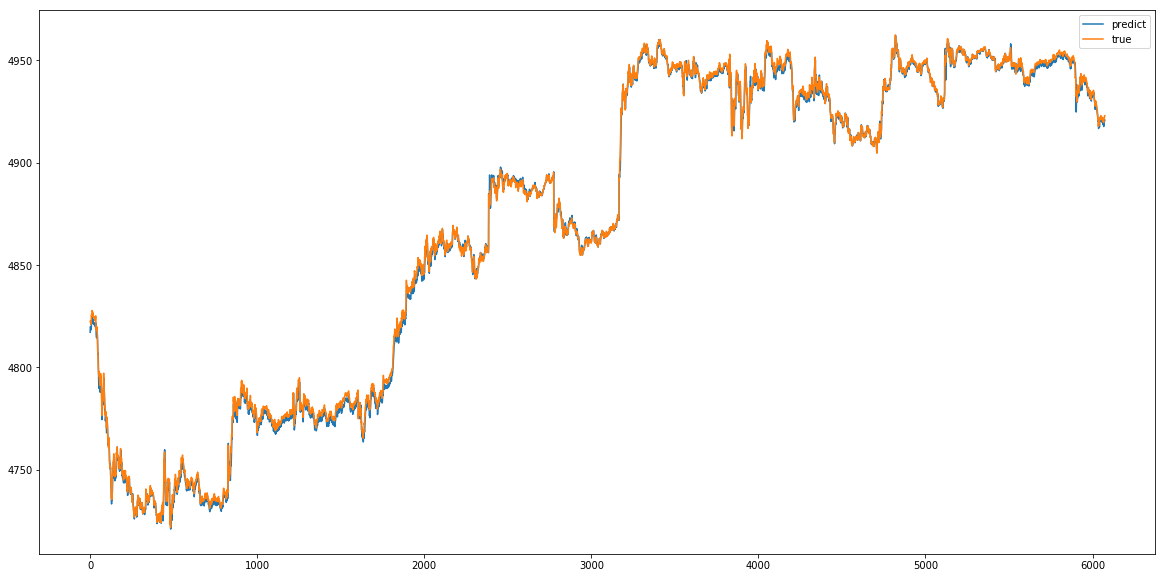

In [1340]:
yhat = model.predict([testX])

plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [1341]:
testY=testY.reshape(-1,1)
scaler=MinMaxScaler(feature_range=(0,1))
testY_inverse=scaler.fit_transform(testY)

In [1342]:
yhat_inverse=scaler.fit_transform(yhat)

In [1335]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.6f' % rmse)

Test RMSE: 0.007878


In [1343]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.6f' % rmse)

Test RMSE: 0.008627


In [1350]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [1351]:
rmse = mean_absolute_percentage_error(testY_inverse, yhat_inverse)
print('Test RMSE: %.6f' % rmse)

Test RMSE: 2.362115


In [1024]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.6f' % rmse)

Test RMSE: 0.007805


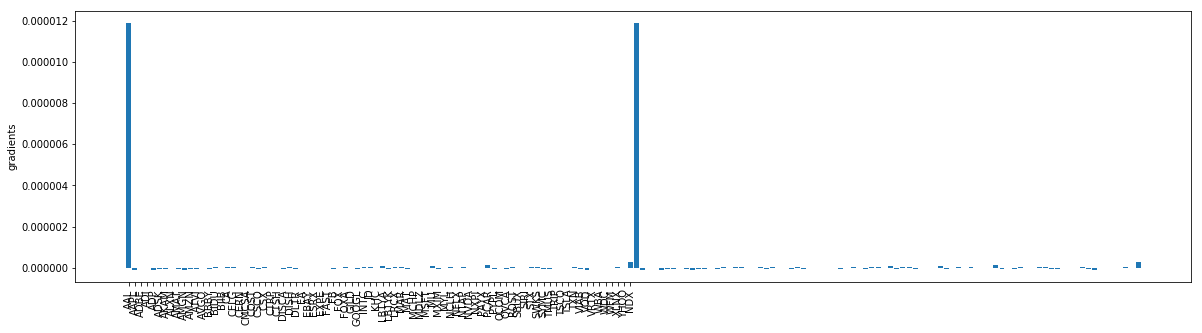

In [793]:


X_test=testX.copy()
columns=data.columns

for i in range(len(X_test)):

    grad_imp = gradient_importance(X_test[i], model)
    grad=grad_imp.tolist()
    grad+=grad
    grad=np.array(grad)
    grad_imp=grad/len(X_test)
    #print(len(grad_imp))
    


plt.figure(figsize=(20,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

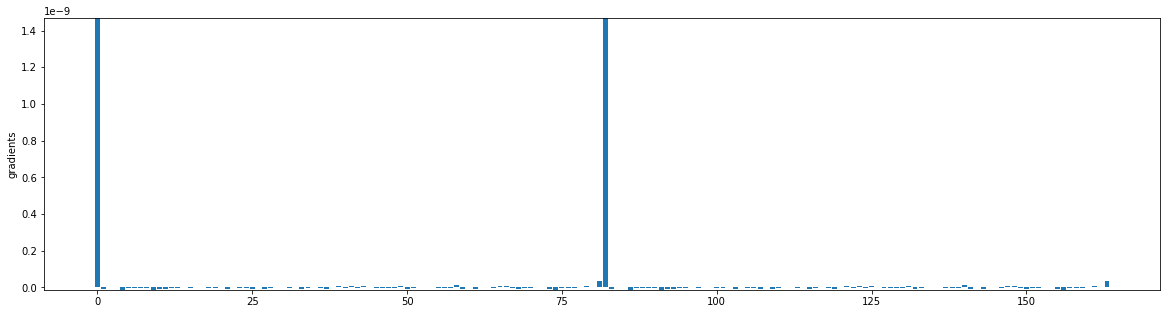

In [782]:
grad_imp=np.array(grad_imp)
grad_imp=grad_imp/len(X_test)

plt.figure(figsize=(20,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

In [794]:
for l in range(len(testX)):
    activation = activation_grad(X_test[l], model)
    act_list= activation.tolist()
    act+=act_list
    activation=act/len(X_test)
plt.figure(figsize=(9,5))
plt.plot(activation)
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('std series'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*30), alpha=0.35)
plt.axis('off'); plt.colorbar()
np.set_printoptions(False)

ValueError: operands could not be broadcast together with shapes (24,) (10,) (24,) 

### nasdaq_res1d2

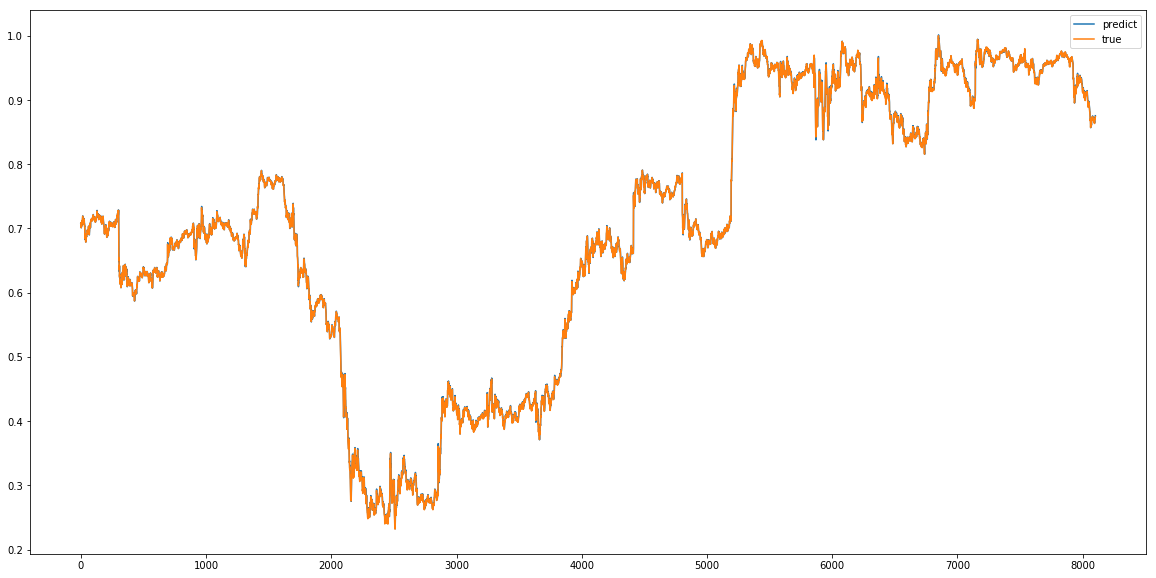

In [743]:
yhat = model.predict([testX])

plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [744]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1,1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [745]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.492


In [769]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.6f' % rmse)

Test RMSE: 0.003870


In [770]:
from math import *
mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.6f' % mae)

Test MAE: 0.002443


In [748]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.005


In [749]:
from sklearn.preprocessing import MaxAbsScaler
maxAbsScaler = MaxAbsScaler()

In [753]:
a=maxAbsScaler.fit(yhat_inverse)
b=maxAbsScaler.fit(testY_inverse)
a

MaxAbsScaler(copy=True)

In [754]:
a=MaxAbsScaler(yhat_inverse)
b=MaxAbsScaler(testY_inverse)
rmse = sqrt(mean_squared_error(a, b))
print('Test RMSE: %.3f' % rmse)

TypeError: Expected sequence or array-like, got <class 'sklearn.preprocessing._data.MaxAbsScaler'>

In [755]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(yhat,testY)
mae

0.0030495275

(<Figure size 1152x144 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdc3dcd6358>)

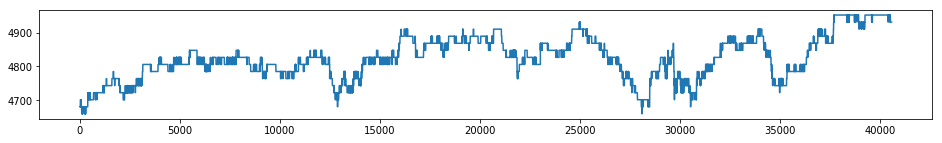

In [239]:
from tsaug.visualization import plot
from tsaug import TimeWarp, Crop, Quantize, Drift, Reverse

my_augmenter = Quantize(n_levels=[5,10,15])
X_aug2= my_augmenter.augment(data['NDX'].values)
plot(X_aug2)

In [242]:
values = X_aug2.reshape(-1,1)
values_ndx = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_ndx = scaler.fit_transform(values_ndx)

scaled_ndx

array([[0.07142925],
       [0.07142925],
       [0.07142925],
       ...,
       [0.92857075],
       [0.92857075],
       [0.92857075]], dtype=float32)

In [243]:
train_size = int(len(scaled_ndx) * 0.8)
val_size = len(scaled_ndx) - train_size

test_size = len(scaled_ndx) - train_size
train3, test3 = scaled_ndx[0:train_size,:], scaled_ndx[train_size:len(scaled_ndx),:]
print(len(train3), len(test3))

32448 8112


In [244]:
look_back = 10
trainX_ndx, trainY_ndx = create_dataset(train3, look_back)
#valX, valY = create_dataset(val, look_back)
testX_ndx, testY_ndx = create_dataset(test3, look_back)

32438
8102


In [247]:
trainX_ndx = np.reshape(trainX_ndx, (trainX_ndx.shape[0], trainX_ndx.shape[1], 1))
#valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))
testX_ndx = np.reshape(testX_ndx, (testX_ndx.shape[0],testX_ndx.shape[1], 1 ))

In [248]:
first_input = Input(shape=(10,1))
in1=layers.Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(6, 1))(first_input)
in2=layers.Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(6, 1))(in1)
in3=layers.Conv1D(filters=128, kernel_size=1, activation='relu')(in2)
in4=layers.MaxPooling1D(pool_size=2)(in3)
in5=layers.Flatten()(in4)
in6=layers.Dense(100)(in5)
in6=layers.Dense(1)(in6)
#in6=layers.Bidirectional(LSTM(50))(first_input)

inputs = Input(shape=(10, 1), name='inputs')
lstm_out = Bidirectional(LSTM(200, return_sequences=True))(inputs)
#lstm_out = LSTM(64, return_sequences=True)(lstm_out)

    # Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([lstm_out, lstm_out])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
concat_out = Concatenate(axis=-1, name='concat_layer')([lstm_out, attn_out])
flat_out = Flatten()(concat_out)

    # Dense layer
#dense_out = Dense(6, activation='relu')(flat_out)
concat=layers.Concatenate()([in6, flat_out])
#dens=layers.Dense(100,activation='relu')(concat)
#dens=layers.Dense(100)
#dens= SeqSelfAttention(attention_activation='relu')(concat)

dens=layers.Dense(1)(concat)

model=tf.keras.Model(inputs=[first_input,inputs],outputs=[dens])
model.compile(optimizer='adam', loss='mse')

In [233]:
history = model.fit([trainX,trainX], trainY, epochs=100, batch_size=100, validation_data=([testX,testX], testY), verbose=1, shuffle=False,callbacks=[cb])

Train on 32438 samples, validate on 8102 samples
Epoch 1/100
32400/32438 [============================>.] - ETA: 0s - loss: 7.4627e-05
Epoch 00001: val_loss did not improve from 0.00003
32438/32438 [==============================] - 21s 632us/sample - loss: 7.4639e-05 - val_loss: 5.7584e-05
Epoch 2/100
32400/32438 [============================>.] - ETA: 0s - loss: 7.1639e-05
Epoch 00002: val_loss did not improve from 0.00003
32438/32438 [==============================] - 21s 633us/sample - loss: 7.1584e-05 - val_loss: 2.6929e-04
Epoch 3/100
32400/32438 [============================>.] - ETA: 0s - loss: 7.9909e-05
Epoch 00003: val_loss did not improve from 0.00003
32438/32438 [==============================] - 21s 632us/sample - loss: 7.9851e-05 - val_loss: 3.1337e-05
Epoch 4/100
32400/32438 [============================>.] - ETA: 0s - loss: 6.7358e-05
Epoch 00004: val_loss did not improve from 0.00003
32438/32438 [==============================] - 21s 632us/sample - loss: 6.7313e-05 - 

Epoch 35/100
32400/32438 [============================>.] - ETA: 0s - loss: 4.5789e-05
Epoch 00035: val_loss did not improve from 0.00003
32438/32438 [==============================] - 21s 633us/sample - loss: 4.5770e-05 - val_loss: 7.0237e-05
Epoch 36/100
32400/32438 [============================>.] - ETA: 0s - loss: 4.7787e-05
Epoch 00036: val_loss did not improve from 0.00003
32438/32438 [==============================] - 21s 632us/sample - loss: 4.7766e-05 - val_loss: 6.6274e-05
Epoch 37/100
32400/32438 [============================>.] - ETA: 0s - loss: 4.4549e-05
Epoch 00037: val_loss did not improve from 0.00003
32438/32438 [==============================] - 21s 632us/sample - loss: 4.4522e-05 - val_loss: 4.5944e-05
Epoch 38/100
32400/32438 [============================>.] - ETA: 0s - loss: 4.3424e-05
Epoch 00038: val_loss did not improve from 0.00003
32438/32438 [==============================] - 21s 632us/sample - loss: 4.3398e-05 - val_loss: 3.5166e-05
Epoch 39/100
32400/32438

Epoch 69/100
32400/32438 [============================>.] - ETA: 0s - loss: 4.1093e-05
Epoch 00069: val_loss did not improve from 0.00003
32438/32438 [==============================] - 20s 632us/sample - loss: 4.1069e-05 - val_loss: 4.1517e-05
Epoch 70/100
32400/32438 [============================>.] - ETA: 0s - loss: 4.1183e-05
Epoch 00070: val_loss did not improve from 0.00003
32438/32438 [==============================] - 21s 633us/sample - loss: 4.1160e-05 - val_loss: 4.5578e-05
Epoch 71/100
32400/32438 [============================>.] - ETA: 0s - loss: 4.1041e-05
Epoch 00071: val_loss did not improve from 0.00003
32438/32438 [==============================] - 21s 632us/sample - loss: 4.1017e-05 - val_loss: 4.5646e-05
Epoch 72/100
32400/32438 [============================>.] - ETA: 0s - loss: 4.0817e-05
Epoch 00072: val_loss did not improve from 0.00003
32438/32438 [==============================] - 20s 632us/sample - loss: 4.0795e-05 - val_loss: 4.4477e-05
Epoch 73/100
32400/32438

In [250]:
checkpoint_path = "saved_weights/nasdaq_aug.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

In [251]:
history = model.fit([trainX_ndx,trainX], trainY, epochs=100, batch_size=100, validation_data=([testX_ndx,testX], testY), verbose=1, shuffle=False,callbacks=[cb])

Train on 32438 samples, validate on 8102 samples
Epoch 1/100
32400/32438 [============================>.] - ETA: 0s - loss: 2.5865e-04
Epoch 00001: val_loss improved from inf to 0.00050, saving model to saved_weights/nasdaq_aug.hdf5
32438/32438 [==============================] - 23s 702us/sample - loss: 2.5881e-04 - val_loss: 4.9727e-04
Epoch 2/100
32400/32438 [============================>.] - ETA: 0s - loss: 4.5906e-04
Epoch 00002: val_loss did not improve from 0.00050
32438/32438 [==============================] - 21s 634us/sample - loss: 4.5862e-04 - val_loss: 6.7429e-04
Epoch 3/100
32400/32438 [============================>.] - ETA: 0s - loss: 1.7249e-04
Epoch 00003: val_loss improved from 0.00050 to 0.00038, saving model to saved_weights/nasdaq_aug.hdf5
32438/32438 [==============================] - 21s 635us/sample - loss: 1.7235e-04 - val_loss: 3.8314e-04
Epoch 4/100
32400/32438 [============================>.] - ETA: 0s - loss: 1.7241e-04
Epoch 00004: val_loss did not improve 

Epoch 33/100
32400/32438 [============================>.] - ETA: 0s - loss: 7.2477e-05
Epoch 00033: val_loss did not improve from 0.00003
32438/32438 [==============================] - 21s 633us/sample - loss: 7.2421e-05 - val_loss: 9.6332e-05
Epoch 34/100
32400/32438 [============================>.] - ETA: 0s - loss: 5.7702e-05
Epoch 00034: val_loss did not improve from 0.00003
32438/32438 [==============================] - 21s 634us/sample - loss: 5.7664e-05 - val_loss: 7.5769e-05
Epoch 35/100
32400/32438 [============================>.] - ETA: 0s - loss: 5.1291e-05
Epoch 00035: val_loss did not improve from 0.00003
32438/32438 [==============================] - 21s 633us/sample - loss: 5.1261e-05 - val_loss: 2.8945e-05
Epoch 36/100
32400/32438 [============================>.] - ETA: 0s - loss: 6.7453e-05
Epoch 00036: val_loss did not improve from 0.00003
32438/32438 [==============================] - 21s 633us/sample - loss: 6.7402e-05 - val_loss: 2.4992e-04
Epoch 37/100
32400/32438

KeyboardInterrupt: 

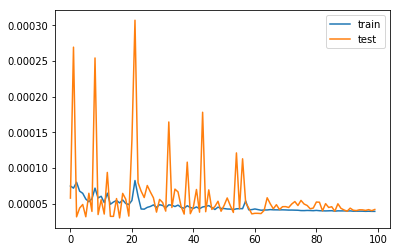

In [234]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [252]:
model.load_weights('saved_weights/nasdaq_aug.hdf5')

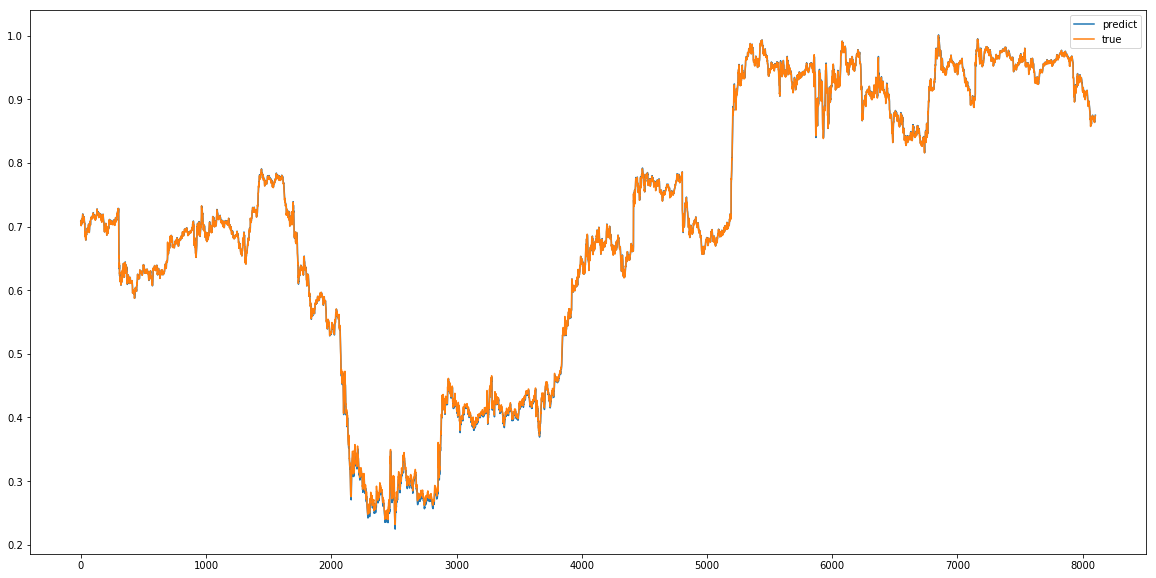

In [253]:
yhat = model.predict([testX_ndx,testX])

plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [254]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1,1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [201]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.628


In [255]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.492


In [202]:
sqrt(2.1215408)

1.4565509946445405

In [1144]:
data1 = pd.read_csv("NEW-DATA-1.T15.txt", sep=' ')
data2 = pd.read_csv("NEW-DATA-2.T15.txt", sep=' ')

In [355]:
data1

,#,Unnamed: 1,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,13/03/2012,11:45,18.1875,17.8275,0.0000,216.560,221.920,39.9125,42.4150,81.6650,...,95436.800,758.8800,0,0,0,18.1150,48.3750,2.0,NaN,NaN
1,13/03/2012,12:00,18.4633,18.1207,6.8000,219.947,220.363,39.9267,42.2453,81.7413,...,95436.800,762.0690,0,0,0,18.4147,47.8080,2.0,NaN,NaN
2,13/03/2012,12:15,18.7673,18.4367,17.0000,219.403,218.933,39.7720,42.2267,81.4240,...,95398.600,766.2510,0,0,0,18.8533,47.4320,2.0,NaN,NaN
3,13/03/2012,12:30,19.0727,18.7513,18.0000,218.613,217.045,39.7760,42.0987,81.5013,...,95360.300,766.0370,0,0,0,19.2907,47.0240,2.0,NaN,NaN
4,13/03/2012,12:45,19.3721,19.0414,20.0000,217.714,216.080,39.7757,42.0686,81.4657,...,95354.900,762.7430,0,0,0,19.7400,45.4743,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,11/04/2012,05:30,21.1520,20.8187,13.0000,190.539,192.181,41.3120,41.6880,11.4427,...,0.000,-3.4340,0,0,0,16.6180,49.2960,3.0,NaN,NaN
2760,11/04/2012,05:45,21.0413,20.7053,12.1333,190.421,193.067,41.3173,41.7200,11.6867,...,523.264,3.8520,0,0,0,16.4013,50.0373,3.0,NaN,NaN
2761,11/04/2012,06:00,20.9347,20.5827,12.0000,190.432,193.653,41.3333,41.7573,19.5387,...,3347.460,26.8300,0,0,0,16.2607,50.0587,3.0,NaN,NaN
2762,11/04/2012,06:15,20.8560,20.5200,12.0000,191.531,193.387,41.3093,41.8107,20.9853,...,7110.660,66.9493,0,0,0,16.2367,49.8400,3.0,NaN,NaN


In [356]:
data2

,#,Unnamed: 1,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,18/04/2012,00:00,20.2000,19.8000,13.0000,207.840,206.560,31.5800,30.1600,11.7200,...,0.00,-3.12000,0,0,0,16.0700,39.0800,3.0,NaN,NaN
1,18/04/2012,00:15,20.1593,19.7600,13.0000,207.499,206.101,31.6240,30.0613,11.5240,...,0.00,-2.80800,0,0,0,16.0400,38.9680,3.0,NaN,NaN
2,18/04/2012,00:30,20.0740,19.6580,13.0000,207.360,206.805,31.6507,30.1773,11.6220,...,0.00,-2.96400,0,0,0,16.0160,38.9467,3.0,NaN,NaN
3,18/04/2012,00:45,19.9773,19.5833,13.0000,207.445,206.325,31.6987,30.2560,11.7847,...,0.00,-3.02933,0,0,0,15.9427,39.0760,3.0,NaN,NaN
4,18/04/2012,01:00,19.8933,19.5000,13.0000,207.840,205.952,31.7707,30.3840,11.5887,...,0.00,-2.88600,0,0,0,15.8627,40.0413,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,02/05/2012,06:30,18.8000,18.2667,11.0000,199.424,201.963,43.0160,44.9813,21.8500,...,7454.38,124.49600,0,0,0,14.4833,58.9920,3.0,NaN,NaN
1369,02/05/2012,06:45,18.7713,18.2153,11.7333,199.200,202.091,43.1920,44.9413,21.1653,...,12526.90,256.59700,0,0,0,14.7540,58.6213,3.0,NaN,NaN
1370,02/05/2012,07:00,18.7860,18.2000,12.0000,199.435,201.739,43.3947,44.9333,21.2640,...,12597.90,281.56800,0,0,0,15.2020,57.6960,3.0,NaN,NaN
1371,02/05/2012,07:15,18.8133,18.2153,12.5333,200.107,200.597,43.3440,44.7013,28.1647,...,15796.90,354.64500,0,0,0,15.7260,56.8613,3.0,NaN,NaN


In [1254]:

target = '3:Temperature_Comedor_Sensor'
cols = [
    '3:Temperature_Comedor_Sensor',
 '4:Temperature_Habitacion_Sensor',
 '5:Weather_Temperature',
 '6:CO2_Comedor_Sensor',
 '7:CO2_Habitacion_Sensor',
 '8:Humedad_Comedor_Sensor',
 '9:Humedad_Habitacion_Sensor',
 '10:Lighting_Comedor_Sensor',
 '11:Lighting_Habitacion_Sensor',
 '12:Precipitacion',
 '13:Meteo_Exterior_Crepusculo',
 '14:Meteo_Exterior_Viento',
 #'15:Meteo_Exterior_Sol_Oest',
 #'16:Meteo_Exterior_Sol_Est',
 '20:Exterior_Entalpic_2',
 '21:Exterior_Entalpic_turbo',
 '22:Temperature_Exterior_Sensor']

In [1255]:
len(cols)

15

In [1256]:
from sklearn.preprocessing import MinMaxScaler
values = data1[cols].values.reshape(-1,15)
values = values.astype('float32')
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(values)

In [1257]:
from sklearn.preprocessing import MinMaxScaler
values1 = data2[cols].values.reshape(-1,15)
values1 = values1.astype('float32')
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled1 = scaler.fit_transform(values1)

In [1258]:
Values=np.concatenate([values,values1])
Scaled=scaler.fit_transform(Values)

In [1259]:
train_size = int(len(Scaled) * 0.85)
val_size = len(Scaled) - train_size

test_size = len(Scaled) - train_size
train, test = Scaled[0:train_size,:], Scaled[train_size:len(Scaled),:]
print(len(train), len(test))

3516 621


In [376]:
Scaled.shape

(4137, 1)

In [1265]:
look_back = 10
trainX, trainY = create_dataset_mul(train, look_back)
#valX, valY = create_dataset(val, look_back)
testX, testY = create_dataset_mul(test, look_back)

3506
611


In [1158]:
print(trainX.shape)
print(testX.shape)

(3511, 5, 17)
(616, 5, 17)


(<Figure size 1152x144 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdbe8a99198>)

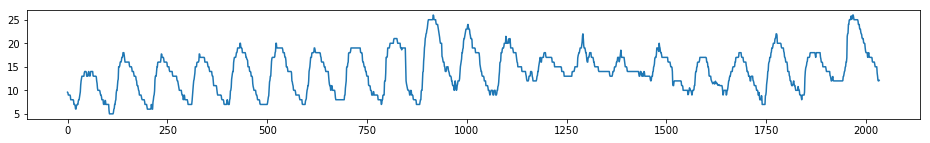

In [538]:
plot(data1[target][730:].values)

(<Figure size 1152x144 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdd700895f8>)

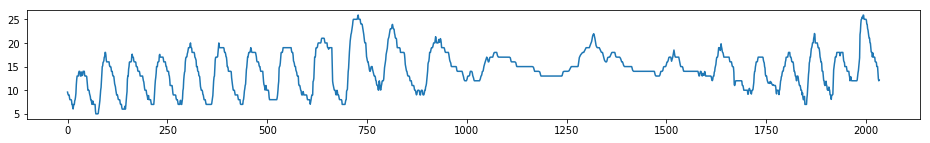

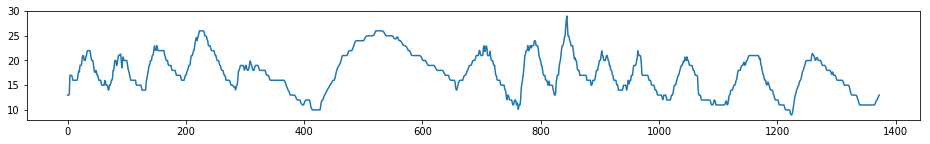

In [539]:
from tsaug.visualization import plot
from tsaug import TimeWarp, Crop, Quantize, Drift, Reverse

my_augmenter = TimeWarp()
X_aug_sml1= my_augmenter.augment(data1[target][730:].values)
X_aug_sml2= my_augmenter.augment(data2[target].values)

plot(X_aug_sml1)
plot(X_aug_sml2)

In [540]:
sml_aug=np.concatenate([X_aug_sml1,X_aug_sml2],axis=0)
sml_aug=sml_aug.reshape(-1,1)

In [541]:
Scaled = scaler.fit_transform(sml_aug)

In [542]:
train_size = int(len(Scaled) * 0.85)
val_size = len(Scaled) - train_size

test_size = len(Scaled) - train_size
train_aug, test_aug = sml_aug[0:train_size,:], sml_aug[train_size:len(Scaled),:]
print(len(train_aug), len(test_aug))

2895 512


In [543]:
look_back = 10
trainX_aug, trainY_aug = create_dataset(train_aug, look_back)
#valX, valY = create_dataset(val, look_back)
testX_aug, testY_aug = create_dataset(test_aug, look_back)

2885
502


In [544]:
trainX_aug = np.reshape(trainX_aug, (trainX_aug.shape[0], trainX_aug.shape[1], 1))
#valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))
testX_aug = np.reshape(testX_aug, (testX_aug.shape[0],testX_aug.shape[1], 1 ))

In [225]:
model = Sequential()
model.add(Bidirectional(LSTM(100, input_shape=(10, Xtrain.shape[2]))))

model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(Xtrain, Ytrain, epochs=100, batch_size=100, validation_data=(Xtest, Ytest), verbose=0, shuffle=False)

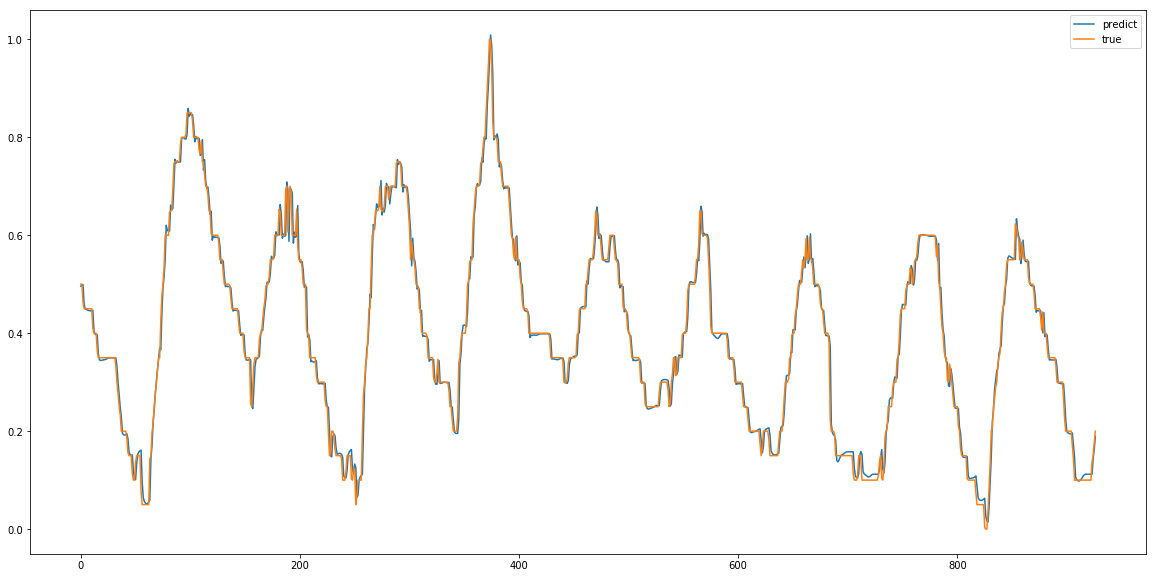

In [226]:
yhat = model.predict(Xtest)

plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(Ytest, label='true')
pyplot.legend()
pyplot.show()

In [227]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1,1))
testY_inverse = scaler.inverse_transform(Ytest.reshape(-1, 1))

In [228]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.461


In [140]:
first_input = Input(shape=(8,1))
in1=layers.Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(8, 1))(first_input)
in2=layers.Conv1D(filters=256, kernel_size=3, activation='relu')(in1)
in3=layers.Conv1D(filters=128, kernel_size=1, activation='relu')(in2)
in4=layers.MaxPooling1D(pool_size=2)(in3)
in5=layers.Flatten()(in4)
in6=layers.Dense(100)(in5)
in6=layers.Dense(1)(in6)
#in6=layers.Bidirectional(LSTM(50))(first_input)

second_input=Input(shape=(8,1))
#in11=layers.Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(6, 1))(second_input)
#in22=layers.Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(6, 1))(in11)
#in33=layers.Conv1D(filters=128, kernel_size=1, activation='relu')(in22)
##in44=layers.MaxPooling1D(pool_size=2)(in33)
#in55=layers.Flatten()(in44)
in11=layers.Bidirectional(LSTM(100))(second_input)

concat=layers.Concatenate()([in6, in11])
#dens=layers.Dense(100,activation='relu')(concat)
#dens=layers.Dense(100)
#dens= SeqSelfAttention(attention_activation='relu')(concat)

dens=layers.Dense(1)(concat)

model=tf.keras.Model(inputs=[first_input,second_input],outputs=[dens])
model.compile(optimizer='adam', loss='mse')


In [142]:
hist = model.fit([trainX,trainX], trainY, epochs=100, batch_size=100, validation_data=([testX,testX], testY), verbose=0, shuffle=False)

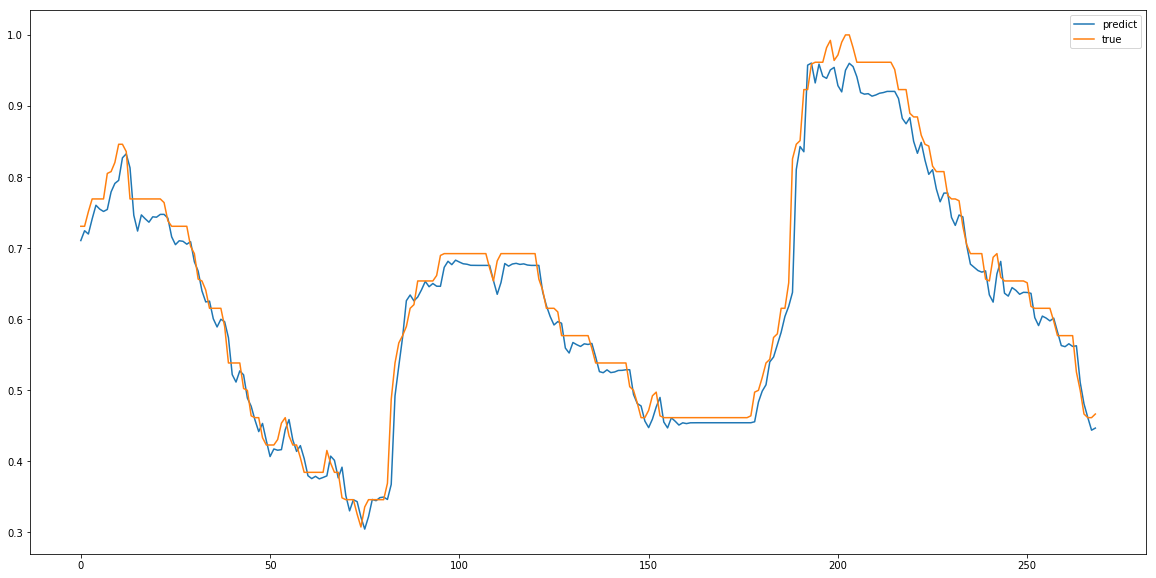

In [146]:
yhat = model.predict([testX,testX])

plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [149]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1,1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [150]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.539


In [22]:
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_out_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>', U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)
            if verbose:
                print('Ws+Uh>', Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [1250]:
from tensorflow.keras.layers import Input, LSTM, Concatenate, Flatten
#from attention_keras import AttentionLayer
from tensorflow.keras import Model

    #num_inputs = 5
    #seq_length = 10
inputs = Input(shape=(10, 17), name='inputs')
lstm_out = Bidirectional(LSTM(100, return_sequences=True))(inputs)
#lstm_out = LSTM(64, return_sequences=True)(lstm_out)

    # Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([lstm_out, lstm_out])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
concat_out = Concatenate(axis=-1, name='concat_layer')([lstm_out, attn_out])
flat_out = Flatten()(concat_out)

    # Dense layer
#dense_out = Dense(6, activation='relu')(flat_out)
predictions= Dense(1)(flat_out)

    # Full model
full_model = Model(inputs=inputs, outputs=predictions)
full_model.compile(optimizer='adam', loss='mse')

In [1251]:
hist= full_model.fit(trainX, trainY, epochs=100, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

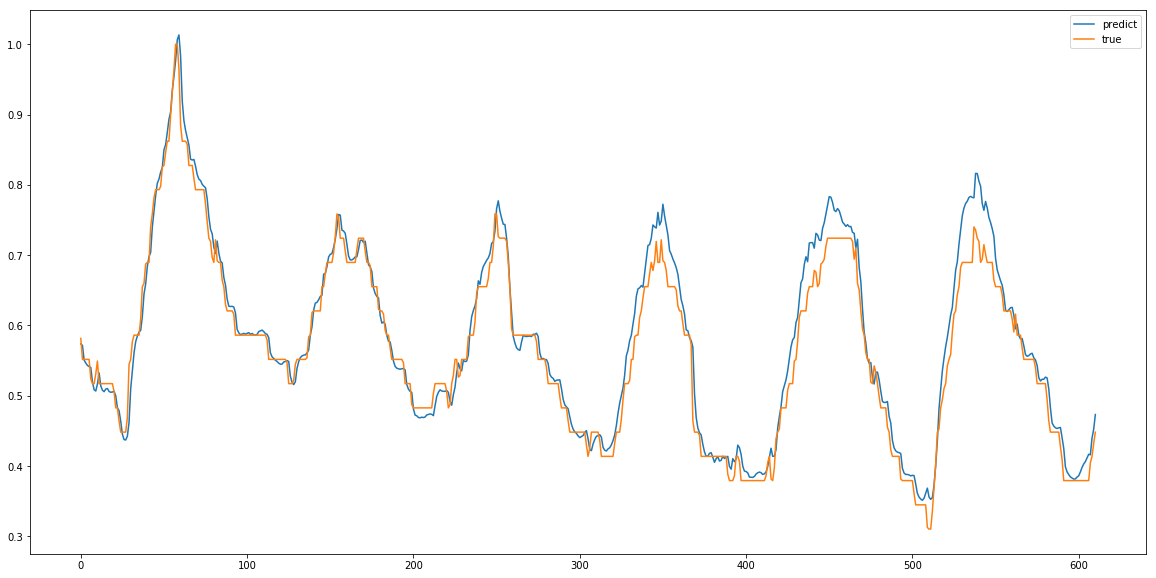

In [1252]:
from matplotlib import *
plt.figure(figsize=(20,10))


yhat = full_model.predict([testX])
yhat=yhat.reshape(-1,1)
y_test1=testY.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(y_test1, label='true')
pyplot.legend()
pyplot.show()

In [1253]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.029


In [89]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1,1))
testY_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

In [90]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.409


In [545]:
first_input = Input(shape=(10,1))
in1=layers.Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(6, 1))(first_input)
in2=layers.Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(6, 1))(in1)
in3=layers.Conv1D(filters=128, kernel_size=1, activation='relu')(in2)
in4=layers.MaxPooling1D(pool_size=2)(in3)
in5=layers.Flatten()(in4)
in6=layers.Dense(100)(in5)
in6=layers.Dense(1)(in6)
#in6=layers.Bidirectional(LSTM(50))(first_input)

inputs = Input(shape=(10, 1), name='inputs')
lstm_out = Bidirectional(LSTM(200, return_sequences=True))(inputs)
#lstm_out = LSTM(64, return_sequences=True)(lstm_out)

    # Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([lstm_out, lstm_out])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
concat_out = Concatenate(axis=-1, name='concat_layer')([lstm_out, attn_out])
flat_out = Flatten()(concat_out)

    # Dense layer
#dense_out = Dense(6, activation='relu')(flat_out)
concat=layers.Concatenate()([in6, flat_out])
#dens=layers.Dense(100,activation='relu')(concat)
#dens=layers.Dense(100)
#dens= SeqSelfAttention(attention_activation='relu')(concat)

dens=layers.Dense(1)(concat)

model=tf.keras.Model(inputs=[first_input,inputs],outputs=[dens])
model.compile(optimizer='adam', loss='mse')

In [546]:
checkpoint_path = "saved_weights/sml_aug.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

In [552]:
hist = model.fit([trainX_aug,trainX], trainY, epochs=100, batch_size=100, validation_data=([testX_aug,testX],testY), verbose=1, shuffle=False,callbacks=[cb])

Train on 2885 samples, validate on 502 samples
Epoch 1/100
2800/2885 [============================>.] - ETA: 0s - loss: 5.0736e-04
Epoch 00001: val_loss improved from 0.00041 to 0.00041, saving model to saved_weights/sml_aug.hdf5
2885/2885 [==============================] - 2s 645us/sample - loss: 5.1813e-04 - val_loss: 4.0691e-04
Epoch 2/100
2800/2885 [============================>.] - ETA: 0s - loss: 5.1307e-04
Epoch 00002: val_loss did not improve from 0.00041
2885/2885 [==============================] - 2s 624us/sample - loss: 5.2412e-04 - val_loss: 4.0724e-04
Epoch 3/100
2800/2885 [============================>.] - ETA: 0s - loss: 5.1671e-04
Epoch 00003: val_loss did not improve from 0.00041
2885/2885 [==============================] - 2s 628us/sample - loss: 5.2728e-04 - val_loss: 4.0748e-04
Epoch 4/100
2800/2885 [============================>.] - ETA: 0s - loss: 5.0857e-04
Epoch 00004: val_loss did not improve from 0.00041
2885/2885 [==============================] - 2s 623us/sa

Epoch 32/100
2800/2885 [============================>.] - ETA: 0s - loss: 5.0467e-04
Epoch 00032: val_loss did not improve from 0.00040
2885/2885 [==============================] - 2s 626us/sample - loss: 5.1447e-04 - val_loss: 4.0047e-04
Epoch 33/100
2800/2885 [============================>.] - ETA: 0s - loss: 5.0871e-04
Epoch 00033: val_loss did not improve from 0.00040
2885/2885 [==============================] - 2s 628us/sample - loss: 5.1813e-04 - val_loss: 4.0125e-04
Epoch 34/100
2800/2885 [============================>.] - ETA: 0s - loss: 5.0415e-04
Epoch 00034: val_loss improved from 0.00040 to 0.00040, saving model to saved_weights/sml_aug.hdf5
2885/2885 [==============================] - 2s 646us/sample - loss: 5.1352e-04 - val_loss: 4.0032e-04
Epoch 35/100
2800/2885 [============================>.] - ETA: 0s - loss: 5.0425e-04
Epoch 00035: val_loss improved from 0.00040 to 0.00040, saving model to saved_weights/sml_aug.hdf5
2885/2885 [==============================] - 2s 645

Epoch 66/100
2800/2885 [============================>.] - ETA: 0s - loss: 4.9943e-04
Epoch 00066: val_loss did not improve from 0.00040
2885/2885 [==============================] - 2s 625us/sample - loss: 5.0896e-04 - val_loss: 4.0082e-04
Epoch 67/100
2800/2885 [============================>.] - ETA: 0s - loss: 5.0286e-04
Epoch 00067: val_loss did not improve from 0.00040
2885/2885 [==============================] - 2s 625us/sample - loss: 5.1298e-04 - val_loss: 4.0073e-04
Epoch 68/100
2800/2885 [============================>.] - ETA: 0s - loss: 5.0727e-04
Epoch 00068: val_loss did not improve from 0.00040
2885/2885 [==============================] - 2s 625us/sample - loss: 5.1723e-04 - val_loss: 4.0292e-04
Epoch 69/100
2800/2885 [============================>.] - ETA: 0s - loss: 5.0704e-04
Epoch 00069: val_loss did not improve from 0.00040
2885/2885 [==============================] - 2s 626us/sample - loss: 5.1713e-04 - val_loss: 4.0326e-04
Epoch 70/100
2800/2885 [====================

In [557]:
model.load_weights('saved_weights/sml_aug.hdf5')

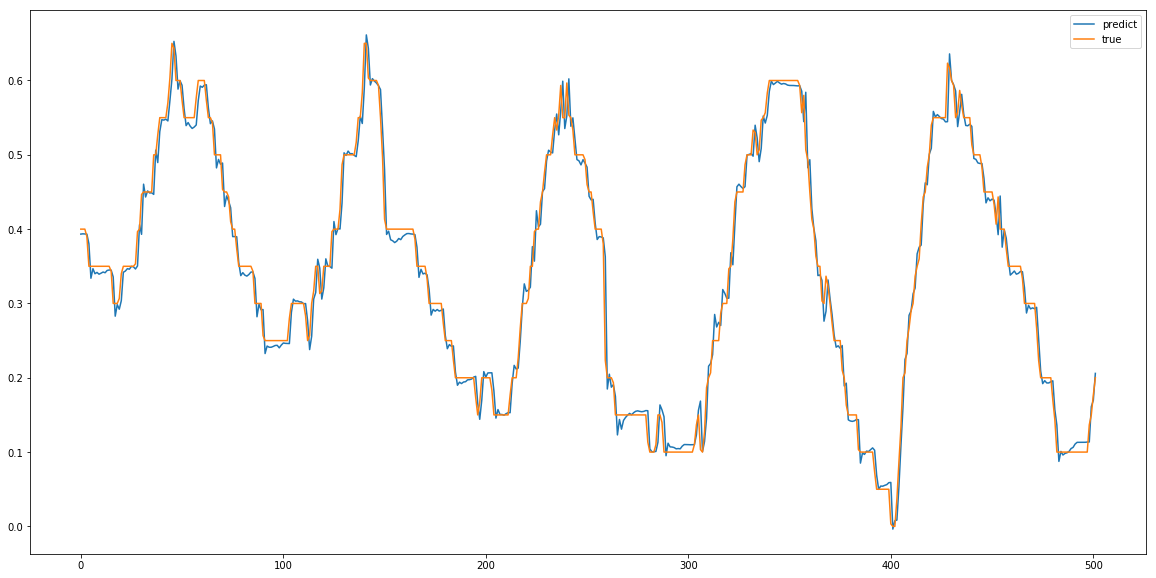

In [558]:
yhat = model.predict([testX_aug,testX])

plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [559]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1,1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [560]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.479


### res1d

In [1283]:
first_input = Input(shape=(10,15))

in1=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(first_input)
in1= BatchNormalization(scale=False)(in1)

in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
in1= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

in1=add([in0,in1],name='extractor')
#ttn_layer = AttentionLayer(name='attention_layer')
#ttn_out, attn_states = attn_layer([in0,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#oncat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
in1=MaxPooling1D(pool_size=2)(in1)
in1=Flatten()(in1)
in1=Dense(100, activation='relu')(in1)
out=Dense(1)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

checkpoint_path = "saved_weights/sml100_res1d.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
# fit model
model.fit(trainX, trainY,validation_data=[testX,testY], epochs=200, verbose=1,callbacks=[cb])

Train on 3506 samples, validate on 611 samples
Epoch 1/200
3264/3506 [==========================>...] - ETA: 0s - loss: 0.1624
Epoch 00001: val_loss improved from inf to 0.16726, saving model to saved_weights/sml100_res1d.hdf5
3506/3506 [==============================] - 1s 262us/sample - loss: 0.1531 - val_loss: 0.1673
Epoch 2/200
3296/3506 [===========================>..] - ETA: 0s - loss: 0.0203
Epoch 00002: val_loss improved from 0.16726 to 0.09328, saving model to saved_weights/sml100_res1d.hdf5
3506/3506 [==============================] - 0s 93us/sample - loss: 0.0201 - val_loss: 0.0933
Epoch 3/200
3296/3506 [===========================>..] - ETA: 0s - loss: 0.0147
Epoch 00003: val_loss improved from 0.09328 to 0.04710, saving model to saved_weights/sml100_res1d.hdf5
3506/3506 [==============================] - 0s 93us/sample - loss: 0.0144 - val_loss: 0.0471
Epoch 4/200
3360/3506 [===========================>..] - ETA: 0s - loss: 0.0099
Epoch 00004: val_loss improved from 0.0471

Epoch 33/200
3040/3506 [=========================>....] - ETA: 0s - loss: 0.0015
Epoch 00033: val_loss improved from 0.00161 to 0.00141, saving model to saved_weights/sml100_res1d.hdf5
3506/3506 [==============================] - 0s 104us/sample - loss: 0.0014 - val_loss: 0.0014
Epoch 34/200
3264/3506 [==========================>...] - ETA: 0s - loss: 9.4282e-04
Epoch 00034: val_loss did not improve from 0.00141
3506/3506 [==============================] - 0s 89us/sample - loss: 9.7629e-04 - val_loss: 0.0021
Epoch 35/200
3392/3506 [============================>.] - ETA: 0s - loss: 0.0015
Epoch 00035: val_loss did not improve from 0.00141
3506/3506 [==============================] - 0s 87us/sample - loss: 0.0015 - val_loss: 0.0014
Epoch 36/200
3264/3506 [==========================>...] - ETA: 0s - loss: 9.8253e-04
Epoch 00036: val_loss did not improve from 0.00141
3506/3506 [==============================] - 0s 88us/sample - loss: 9.8277e-04 - val_loss: 0.0027
Epoch 37/200
3136/3506 [==

3264/3506 [==========================>...] - ETA: 0s - loss: 6.4892e-04
Epoch 00067: val_loss did not improve from 0.00089
3506/3506 [==============================] - 0s 107us/sample - loss: 6.6863e-04 - val_loss: 0.0028
Epoch 68/200
3264/3506 [==========================>...] - ETA: 0s - loss: 5.0958e-04
Epoch 00068: val_loss did not improve from 0.00089
3506/3506 [==============================] - 0s 106us/sample - loss: 5.1564e-04 - val_loss: 9.8352e-04
Epoch 69/200
3264/3506 [==========================>...] - ETA: 0s - loss: 5.7506e-04
Epoch 00069: val_loss improved from 0.00089 to 0.00080, saving model to saved_weights/sml100_res1d.hdf5
3506/3506 [==============================] - 0s 115us/sample - loss: 5.7486e-04 - val_loss: 8.0470e-04
Epoch 70/200
3328/3506 [===========================>..] - ETA: 0s - loss: 6.9906e-04
Epoch 00070: val_loss did not improve from 0.00080
3506/3506 [==============================] - 0s 87us/sample - loss: 7.0171e-04 - val_loss: 0.0011
Epoch 71/200


Epoch 100/200
3264/3506 [==========================>...] - ETA: 0s - loss: 3.7448e-04
Epoch 00100: val_loss did not improve from 0.00044
3506/3506 [==============================] - 0s 88us/sample - loss: 3.9545e-04 - val_loss: 0.0011
Epoch 101/200
3392/3506 [============================>.] - ETA: 0s - loss: 6.8741e-04
Epoch 00101: val_loss did not improve from 0.00044
3506/3506 [==============================] - 0s 87us/sample - loss: 6.9318e-04 - val_loss: 0.0020
Epoch 102/200
3296/3506 [===========================>..] - ETA: 0s - loss: 5.0203e-04
Epoch 00102: val_loss did not improve from 0.00044
3506/3506 [==============================] - 0s 88us/sample - loss: 5.0184e-04 - val_loss: 0.0011
Epoch 103/200
3392/3506 [============================>.] - ETA: 0s - loss: 3.3110e-04
Epoch 00103: val_loss did not improve from 0.00044
3506/3506 [==============================] - 0s 86us/sample - loss: 3.2619e-04 - val_loss: 0.0012
Epoch 104/200
3360/3506 [===========================>..] - E

Epoch 134/200
3072/3506 [=========================>....] - ETA: 0s - loss: 3.0145e-04
Epoch 00134: val_loss did not improve from 0.00038
3506/3506 [==============================] - 0s 95us/sample - loss: 2.9046e-04 - val_loss: 8.8132e-04
Epoch 135/200
3040/3506 [=========================>....] - ETA: 0s - loss: 3.1210e-04
Epoch 00135: val_loss did not improve from 0.00038
3506/3506 [==============================] - 0s 97us/sample - loss: 3.3270e-04 - val_loss: 5.3270e-04
Epoch 136/200
3072/3506 [=========================>....] - ETA: 0s - loss: 2.5458e-04
Epoch 00136: val_loss did not improve from 0.00038
3506/3506 [==============================] - 0s 97us/sample - loss: 2.5718e-04 - val_loss: 4.2402e-04
Epoch 137/200
2912/3506 [=======================>......] - ETA: 0s - loss: 3.4212e-04
Epoch 00137: val_loss did not improve from 0.00038
3506/3506 [==============================] - 0s 98us/sample - loss: 3.2752e-04 - val_loss: 4.1816e-04
Epoch 138/200
3072/3506 [===================

3392/3506 [============================>.] - ETA: 0s - loss: 2.4566e-04
Epoch 00167: val_loss did not improve from 0.00034
3506/3506 [==============================] - 0s 87us/sample - loss: 2.4451e-04 - val_loss: 3.4384e-04
Epoch 168/200
3296/3506 [===========================>..] - ETA: 0s - loss: 2.3816e-04
Epoch 00168: val_loss did not improve from 0.00034
3506/3506 [==============================] - 0s 88us/sample - loss: 2.3225e-04 - val_loss: 3.7491e-04
Epoch 169/200
3072/3506 [=========================>....] - ETA: 0s - loss: 2.1303e-04
Epoch 00169: val_loss did not improve from 0.00034
3506/3506 [==============================] - 0s 95us/sample - loss: 2.1303e-04 - val_loss: 5.8558e-04
Epoch 170/200
3040/3506 [=========================>....] - ETA: 0s - loss: 2.0492e-04
Epoch 00170: val_loss did not improve from 0.00034
3506/3506 [==============================] - 0s 96us/sample - loss: 1.9996e-04 - val_loss: 5.3025e-04
Epoch 171/200
3072/3506 [=========================>....] -

In [1217]:
model.summary()

Model: "model_33649"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_128 (InputLayer)       [(None, 20, 17)]          0         
_________________________________________________________________
conv1d_365 (Conv1D)          (None, 20, 64)            3328      
_________________________________________________________________
conv1d_367 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_118 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
flatten_160 (Flatten)        (None, 640)               0         
_________________________________________________________________
dense_296 (Dense)            (None, 100)               64100     
_________________________________________________________________
dense_297 (Dense)            (None, 1)                 

In [1284]:
model.load_weights("saved_weights/sml100_res1d.hdf5")

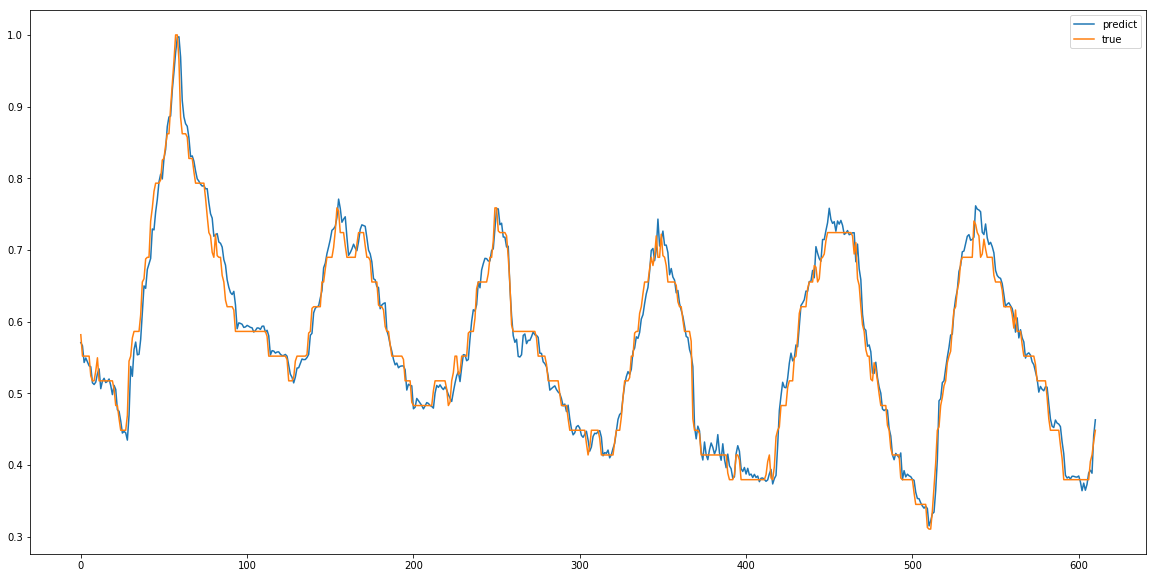

In [1285]:
yhat = model.predict([testX])

plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [1201]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01727


In [1205]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01775


In [1274]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01760


In [1286]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01835
